<a href="https://colab.research.google.com/github/Felipe34515/Trabajos-BI/blob/main/LAB2_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 2 - INTELIGENCIA DE NEGOCIOS**

Santiago Pardo - 202013025



Luis Plazas - 202013155




Felipe Rueda - 202010903



## DESCRIPCIÓN DEL PROBLEMA

### CONTEXTO

La Organización Mundial de la Salud está piloteando un nuevo programa de financiamiento que busca intervenir en poblaciones con un alto número de fallecimientos debido al cáncer. El objetivo es permitirle a los gobiernos nacionales y locales invertir en programas de diagnóstico temprano, instalaciones de tratamiento, entrenamiento de personal hospitalario y financiamiento de la investigación en esta enfermedad. Debido a que este programa busca beneficiar al mediano y largo plazo poblaciones vulnerables, se ha determinado la necesidad de crear un modelo predictivo para empezar interviniendo poblaciones que, dadas sus características, tengan un alto número de muertes por cáncer aunque no haya registros completos u oficiales.



Para ello y de la mano del gobierno norteamericano, la OMS ha recopilado datos de Estados Unidos para la creación del modelo a partir de diversas características demográficas y del estado de los servicios de salud de una población para determinar el número de muertes por cáncer por cada 100.000 habitantes. El objetivo, es que este modelo permita tomar decisiones de la asignación de finaciamiento del nuevo programa, además de determinar qué datos son relevantes y cuáles no lo son para la estimación y la recolección de información.

### DICCIONARIO DE DATOS



A continuación se da una descripción detallada de los datos en crudo mediante un diccionario de datos:

| **Atributo** | **Descripción** |
|---|---|
| deathRate | Muertes promedio de cáncer por cada 100.000 habitantes |
| avgAnnCount | Número promedio de casos diagnosticados de cáncer reportados anualmente |
| avgDeathsPerYear | Número promedio de muertes reportadas por cáncer |
| incidenceRate | Número de diagnósticos promedio de cáncer por cada 100.000 habitantes. |
| medianIncome | Ingreso mediano por condado |
| poEst2015 | Población del condado |
| povertyPercent | Porcentaje de la población en la pobreza |
| studyPerCap | Número de ensayos clínicos relacionados con el cáncer por condado |
| binedInc | Ingreso mediano per capita (clasificado por decil) |
| MedianAge | Edad mediana de los residentes del condado |
| MedianAgeMale | Edad mediana de los residentes de sexo masculino del condado |
| MedianAgeFemale | Edad mediana de los residentes de sexo femenino del condado |
| Geography | Nombre del condado |
| AvgHouseholdSize | Número mediano de integrantes de una familia del condado |
| PercentMarried | Porcentaje de residentes del condado que están casados |
| PctNoHS18_24 | Porcentaje de residentes del condado entre las edades 18-24 cuyo mayor   nivel educativo es menor a escuela primaria (sin terminar) |
| PctHS18_24 | Porcentaje de residentes del condado entre las edades 18-24 cuyo nivel   educativo es escuela primaria |
| PctSomeCol18_24 | Porcentaje de residentes del condado entre las edades 18-24 cuyo nivel   educativo es escuela secundaria |
| PctBachDeg18_24 | Porcentaje de residentes del condado entre las edades 18-24 cuyo nivel   educativo es pregrado |
| PctHS25_Over | Porcentaje de residentes del condado de edad igual o mayor a 25 cuyo   nivel educativo es escuela primaria |
| PctBachDeg25_Over | Porcentaje de residentes del condado de edad igual o mayor a 25 cuyo   nivel educativo es pregrado |
| PctEmployed16_Over | Porcentaje de residentes del condado de edades mayores a 16 que tienen   empleo |
| PctUnemployed16_Over | Porcentaje de residentes del condado de edades mayores a 16 que están   desemplados |
| PctPrivateCoverage | Porcentaje de residentes del condado con cobertura de salud privada |
| PctPrivateCoverageAlone | Porcentaje de residentes del condado con covertura de salud únicamente   (sin financiación pública) |
| PctEmpPrivCoverage | Porcentaje de residentes del condado con cobertura de salud privada   cubierta por el empelador. |
| PctPublicCoverage | Porcentaje de residentes del condado con cobertura de salud privada   cubierta por el empelador. |
| PctPublicCoverageAlone | Porcentaje de residentes del condado con cobertura de salud cubierta por   el gobierno |
| PctWhite | Porcentaje de residentes del condado que se identifican como blancos |
| PctBlack | Porcentaje de residentes del condado que se identifican como negros |
| PctAsian | Porcenaje de residentes del condado que se identifican como asiáticos. |
| PctOtherRace | Porcentaje de residentes del condado que no se identifican como blancos,   negros o asiáticos. |
| PctMarriedHouseholds | Porcentaje de matrimonios. |
| BirthRate | Número de nacimientos vivos relativo al número de mujeres del condado |



## ENTENDIMIENTO DE LOS DATOS

In [18]:
import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib as plt
#Lectura de Datos
#Entrenamiento
#Luis
#Santiago
df_train = pd.read_csv("202410_Laboratorio 2 - Regresión_train_data.csv",sep=',')
df_test = pd.read_csv("202410_Laboratorio 2 - Regresión_val_data.csv",sep=',')
#Felipe
#Prueba
#Luis
#Santiago
#Felipe

In [23]:
df_train

avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0            37.0                13          521.9      36836        4201   
1           107.0                37          412.7      48683       20455   
2            22.0                12          472.9      60946        3294   
3            20.0                10          527.2      29477        2302   
4            56.0                19          446.4      38478       11310   
...           ...               ...            ...        ...         ...   
2127        506.0               215          461.3      31382       89208   
2128        176.0                74          368.3      62752       47520   
2129       4431.0              1477          507.1      70074      776043   
2130        378.0               157          400.2      55798       78593   
2131       2459.0               909          439.2      54872      682545   

      povertyPercent  studyPerCap           binnedInc  MedianAge  \
0               18.3     0.000000  (34218.1, 37413.8]       47.5   
1               11.7     0.000000  (48021.6, 51046.4]       43.1   
2                7.4     0.000000  (54545.6, 61494.5]       43.6   
3               29.5     0.000000    [22640, 34218.1]       49.2   
4               23.6     0.000000  (37413.8, 40362.7]       37.5   
...              ...          ...                 ...        ...   
2127            30.8    44.839028    [22640, 34218.1]       38.7   
2128            11.0     0.000000   (61494.5, 125635]       40.4   
2129            10.7    73.449538   (61494.5, 125635]       40.6   
2130            11.7     0.000000  (54545.6, 61494.5]       41.5   
2131            15.9   881.993129  (54545.6, 61494.5]       34.1   

      MedianAgeMale  ...  PctEmpPrivCoverage PctPublicCoverage  \
0              44.9  ...                30.2              43.2   
1              42.4  ...                44.4              35.7   
2              43.4  ...                48.6              24.5   
3              46.8  ...                24.7              53.6   
4              37.4  ...                29.8              35.5   
...             ...  ...                 ...               ...   
2127           36.5  ...                30.6              43.0   
2128           39.3  ...                47.0              27.0   
2129           38.9  ...                52.0              37.2   
2130           40.6  ...                50.2              27.2   
2131           33.8  ...                44.6              31.1   

      PctPublicCoverageAlone   PctWhite   PctBlack  PctAsian  PctOtherRace  \
0                       20.0  88.570752   0.118315  1.135826      0.141978   
1                       17.8  97.797657   0.486169  0.116680      0.486169   
2                        5.7  95.560385   0.124185  0.000000      2.390562   
3                       27.8  49.613070  49.226139  0.386930      0.000000   
4                       20.6  88.516367   0.079197  0.167195      4.593453   
...                      ...        ...        ...       ...           ...   
2127                    26.0  34.319625  61.893458  1.024565      0.939553   
2128                    12.0  93.363950   1.612868  0.263684      1.900723   
2129                    21.4  79.796923   3.912684  3.454740     10.182117   
2130                    13.0  94.254676   1.824259  0.723790      1.400013   
2131                    21.1  76.080806   9.706398  3.555739      5.976720   

      PctMarriedHouseholds  BirthRate  deathRate  
0                47.157360  10.704225      169.4  
1                53.723161   6.550868      131.8  
2                55.846042   9.935897      209.3  
3                38.522167   8.616188      250.0  
4                52.379740   9.079392      152.5  
...                    ...        ...        ...  
2127             38.665070   6.172502      194.1  
2128             61.433094   5.291214      152.8  
2129             48.513782   4.825363      161.5  
2130             58.1974

In [28]:
#Datos sin la columna objetivo (para realizar el análisis)
df_train_x = df_train.drop('deathRate',axis=1)

In [33]:
#Si lo van a ejecutar, descomentar y ejecutarlo una sola vez porque se demora mucho en producir el informe (6 minutos)
#profiling = ydata_profiling.ProfileReport(df_train_x)
#profiling.to_file('lab2_report.html')

### Análisis del Reporte

#### Resumen General![studyPerCap.png](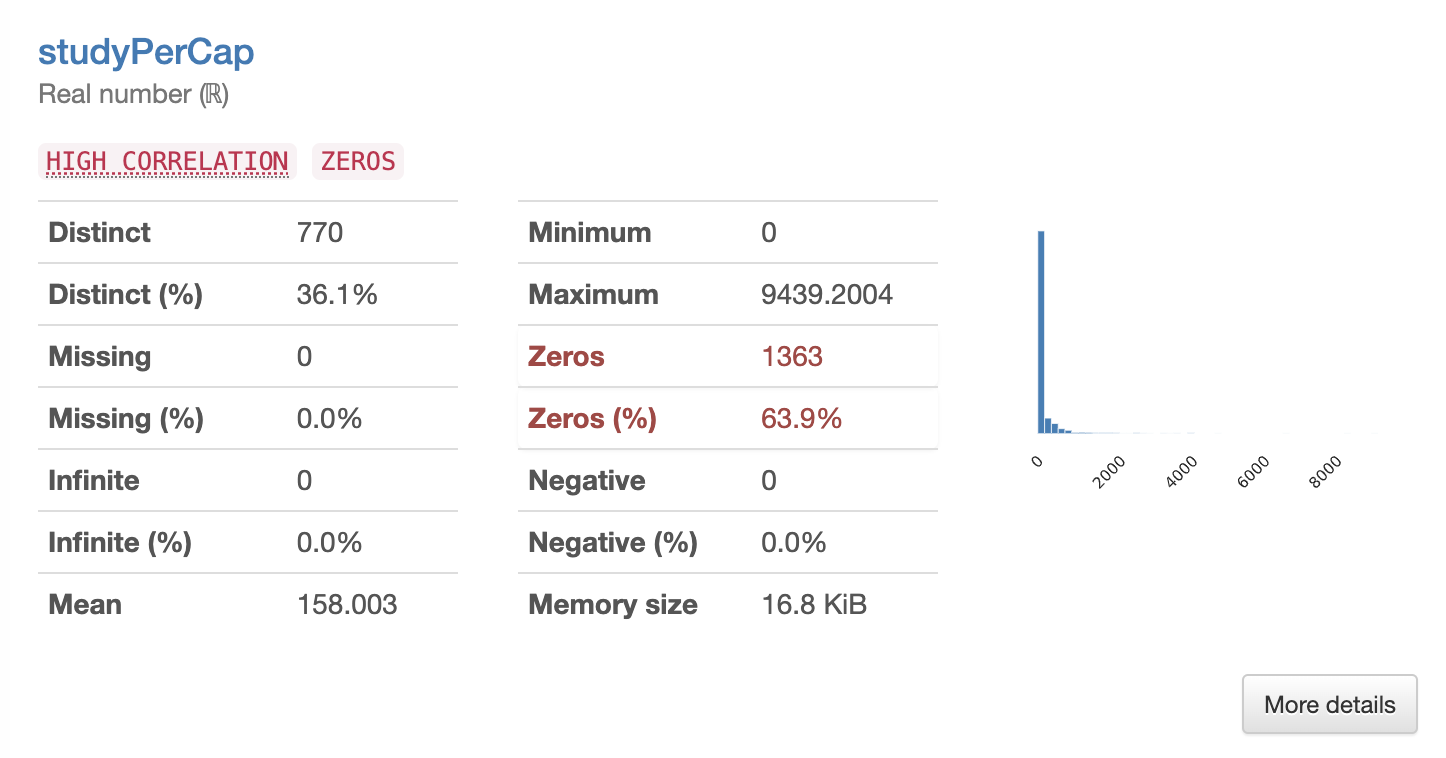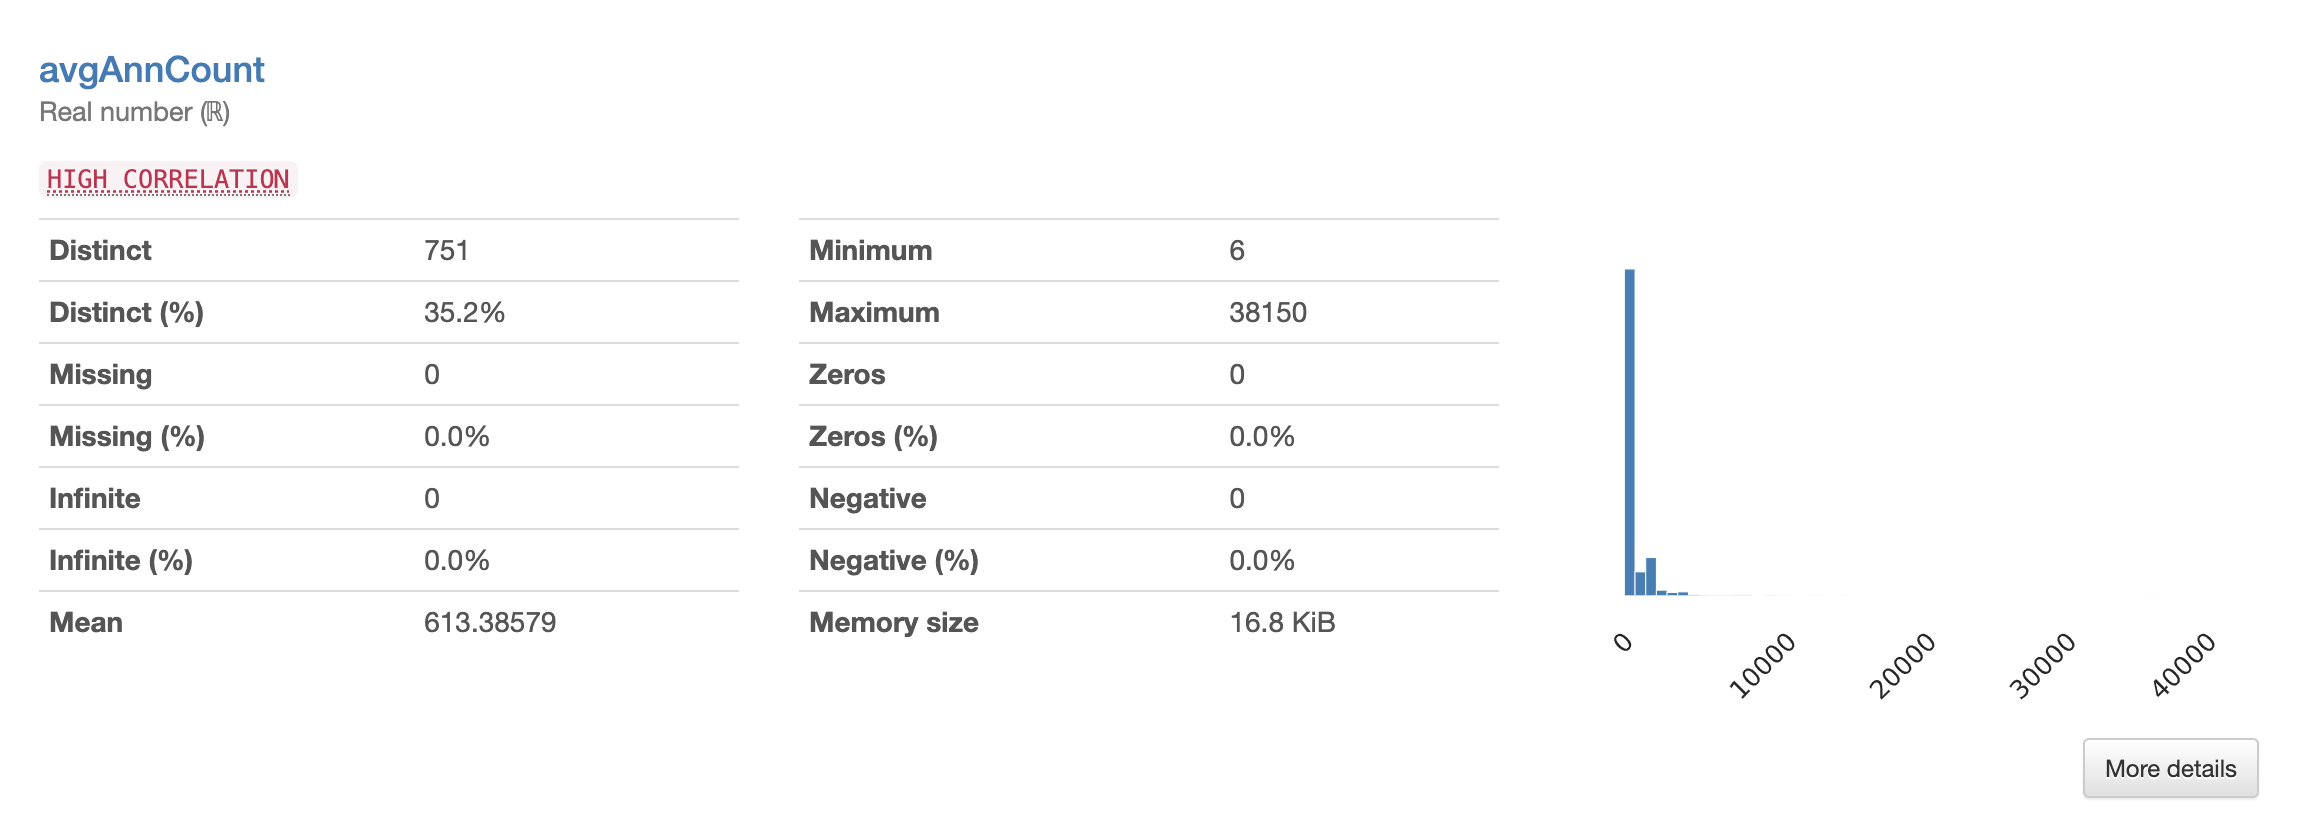)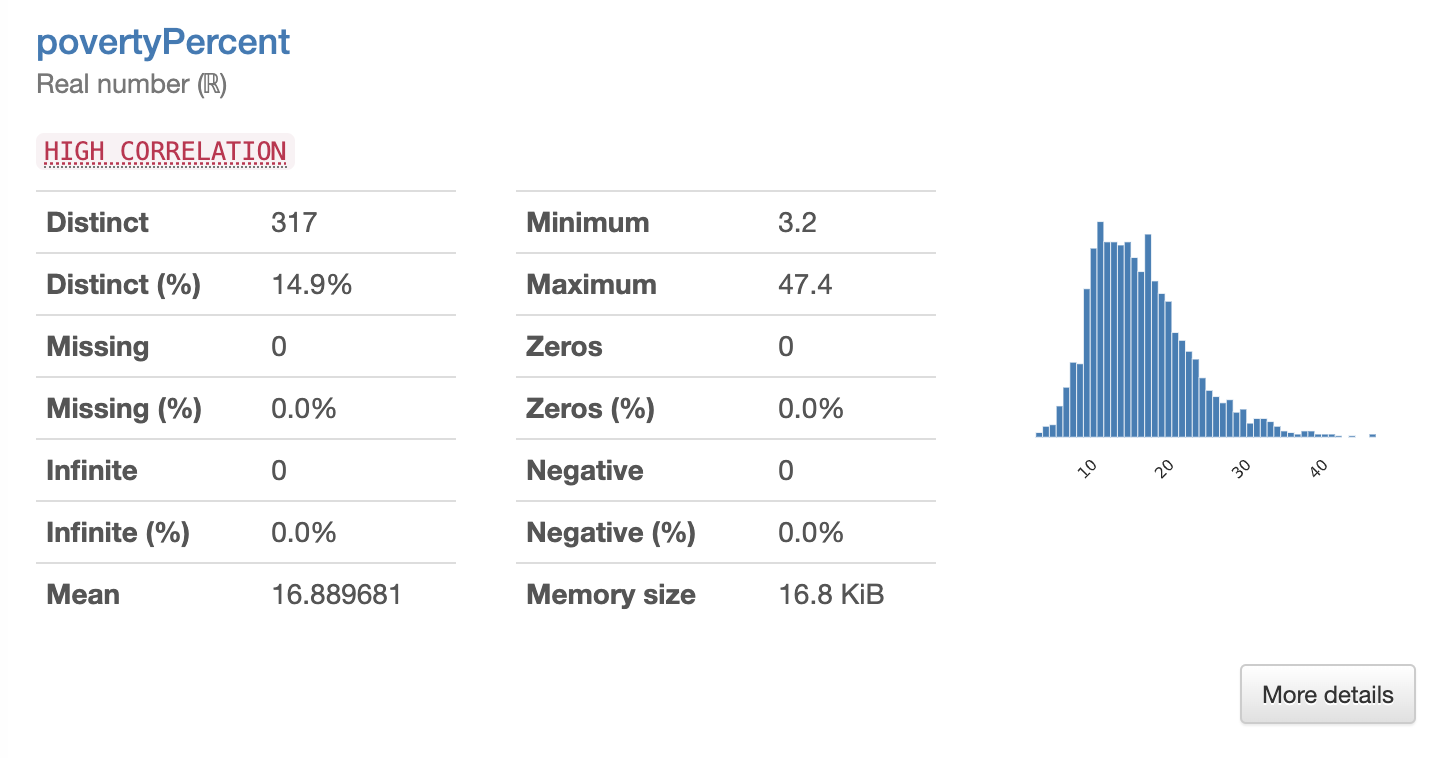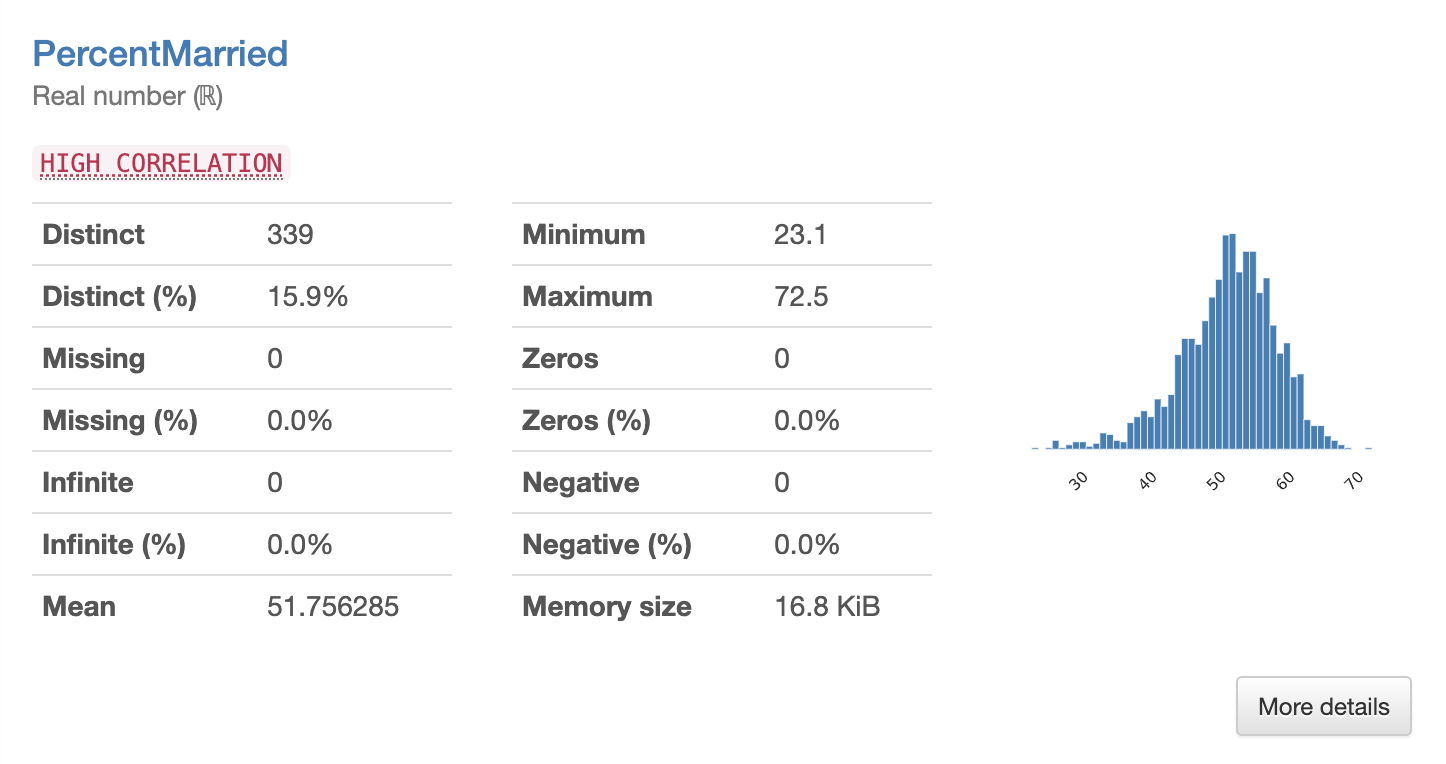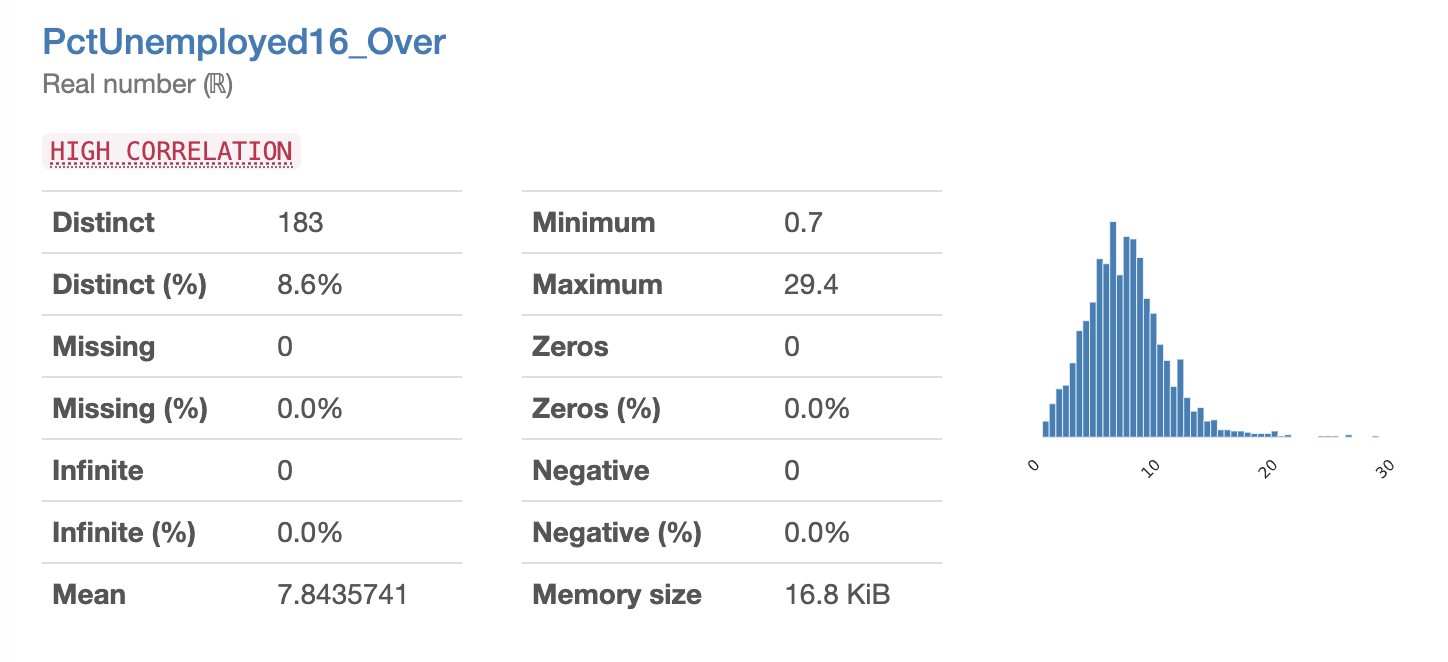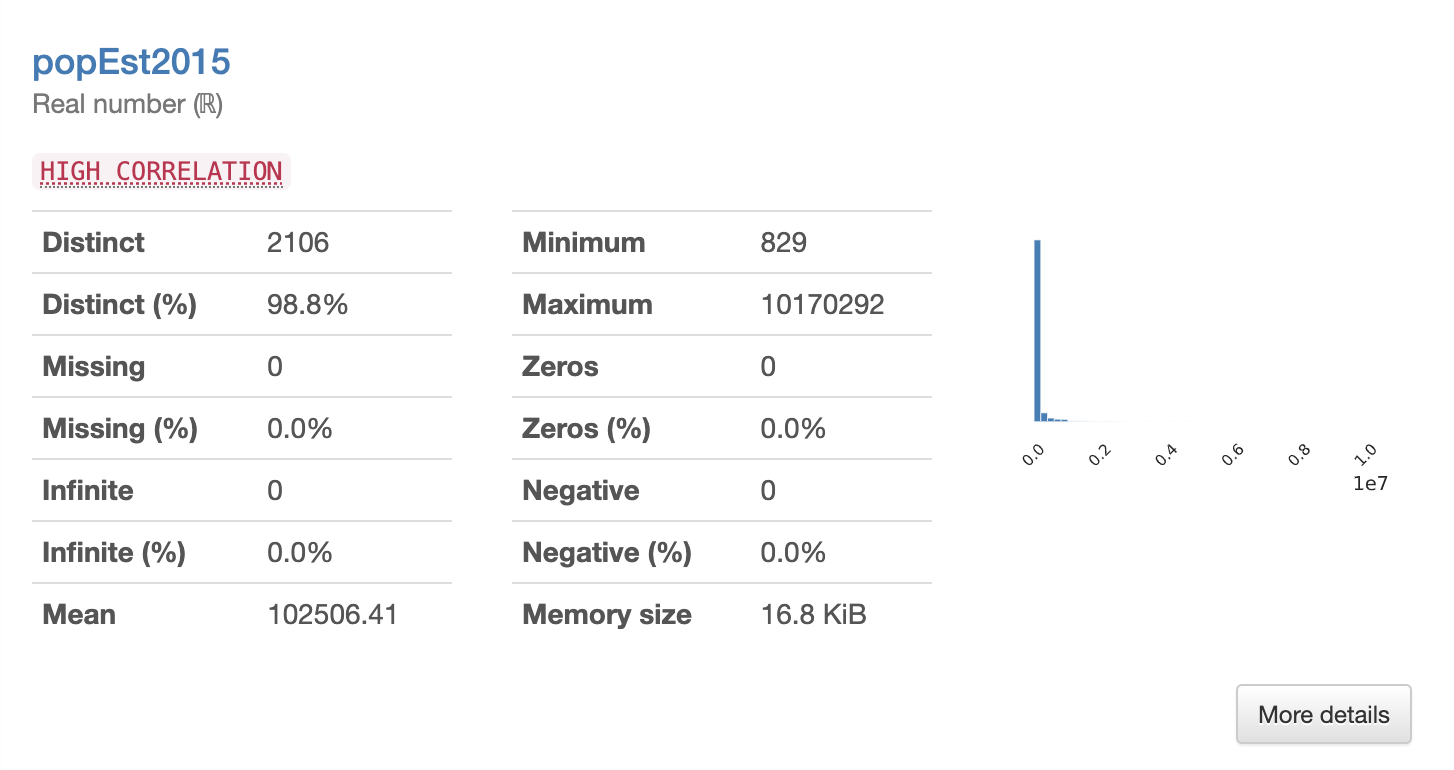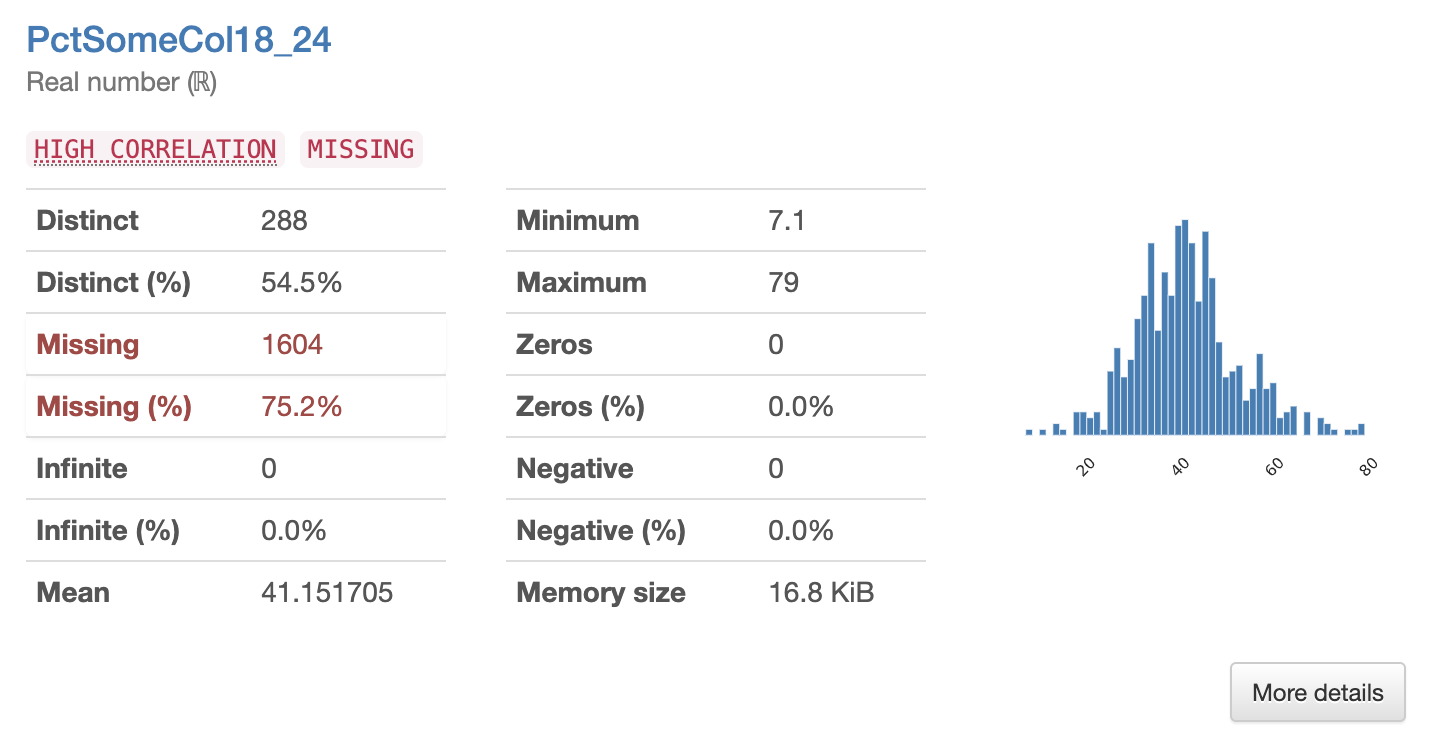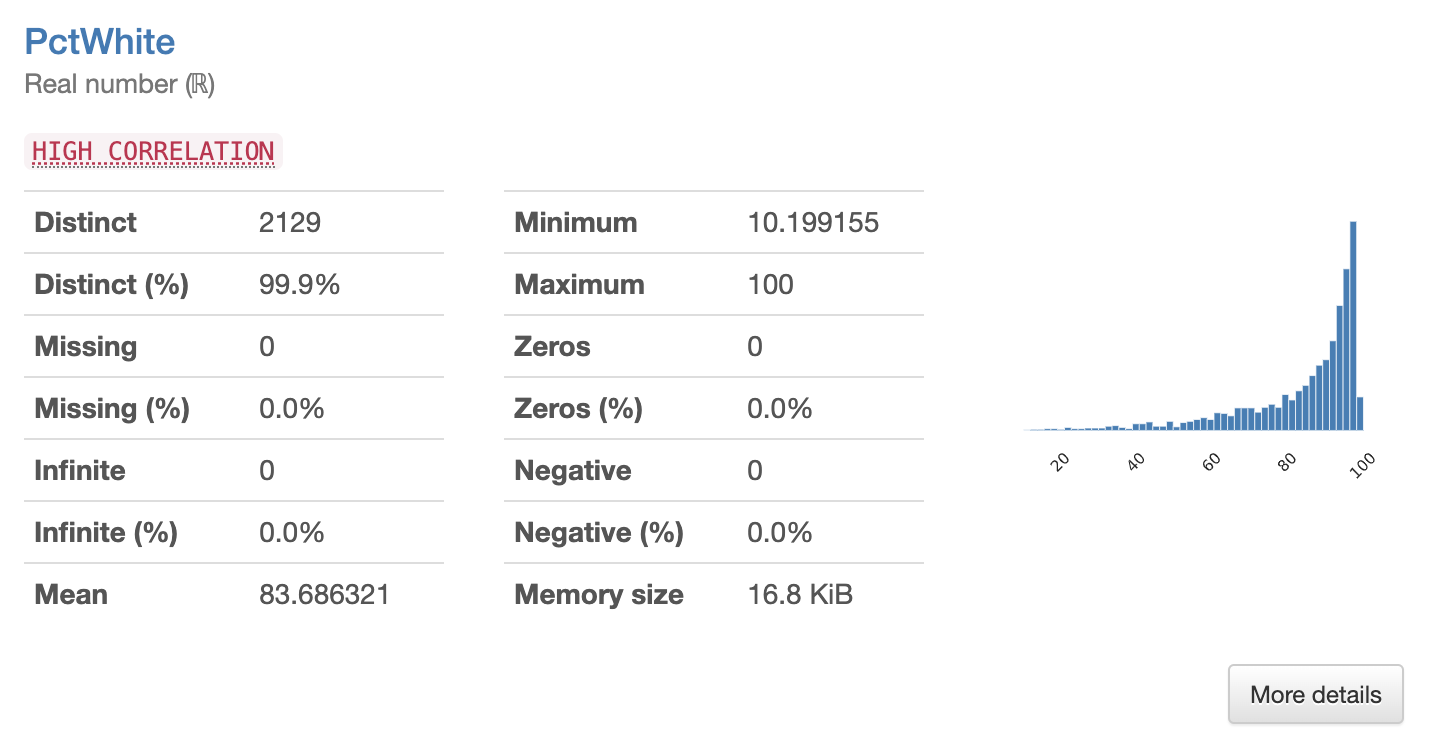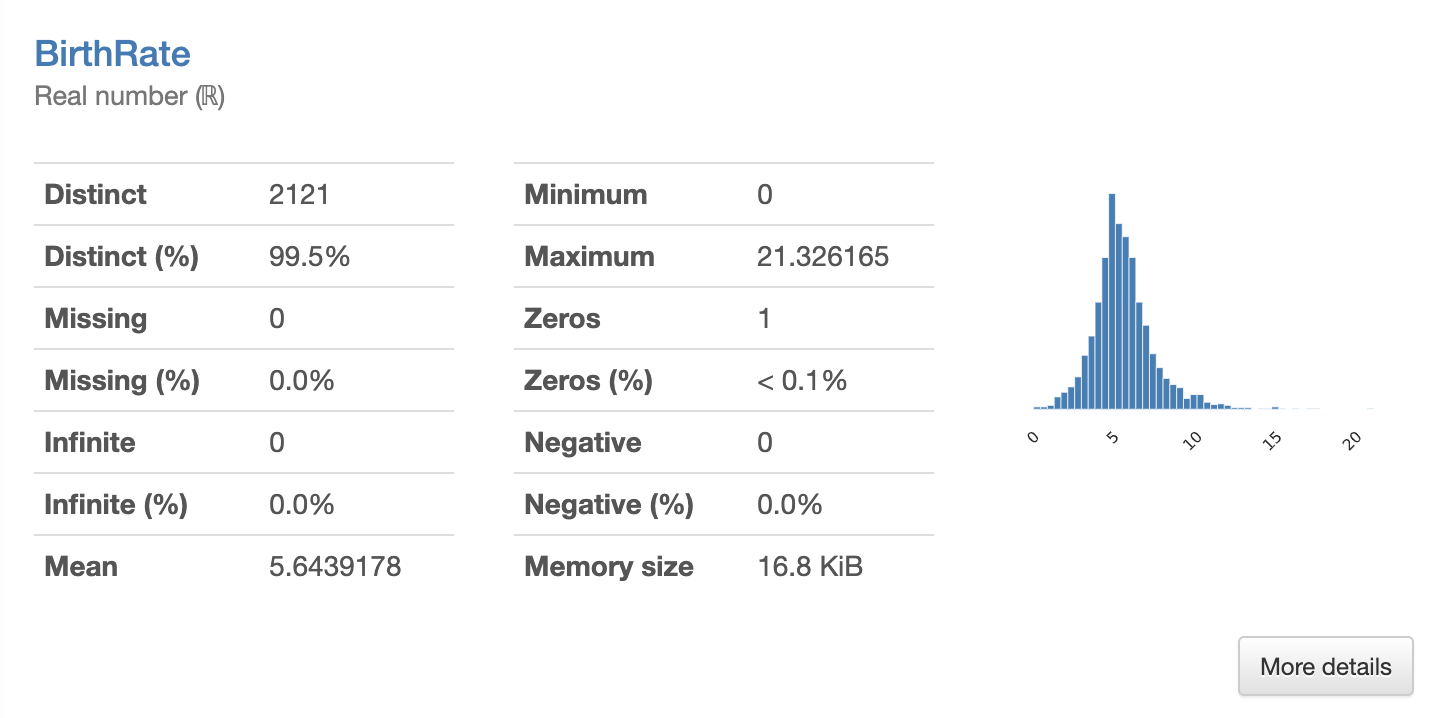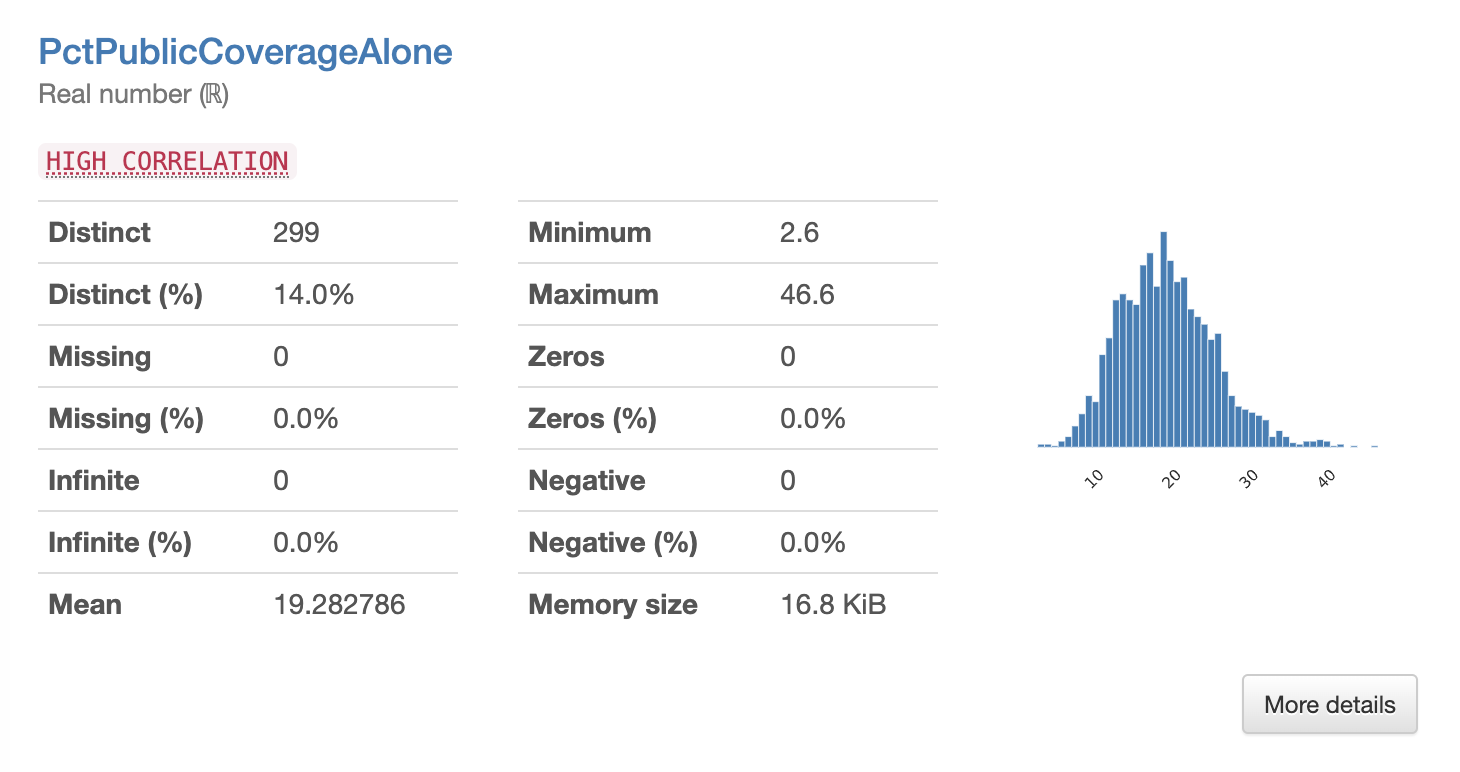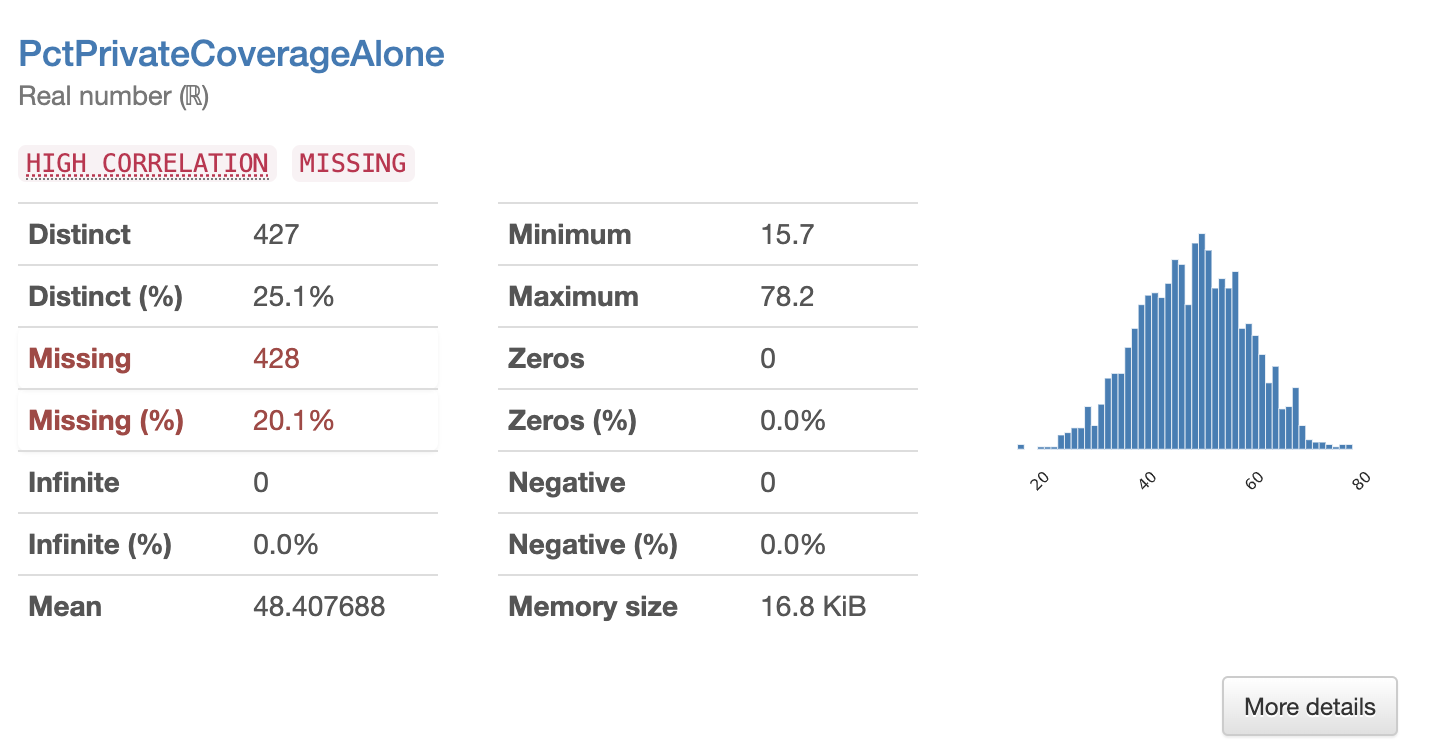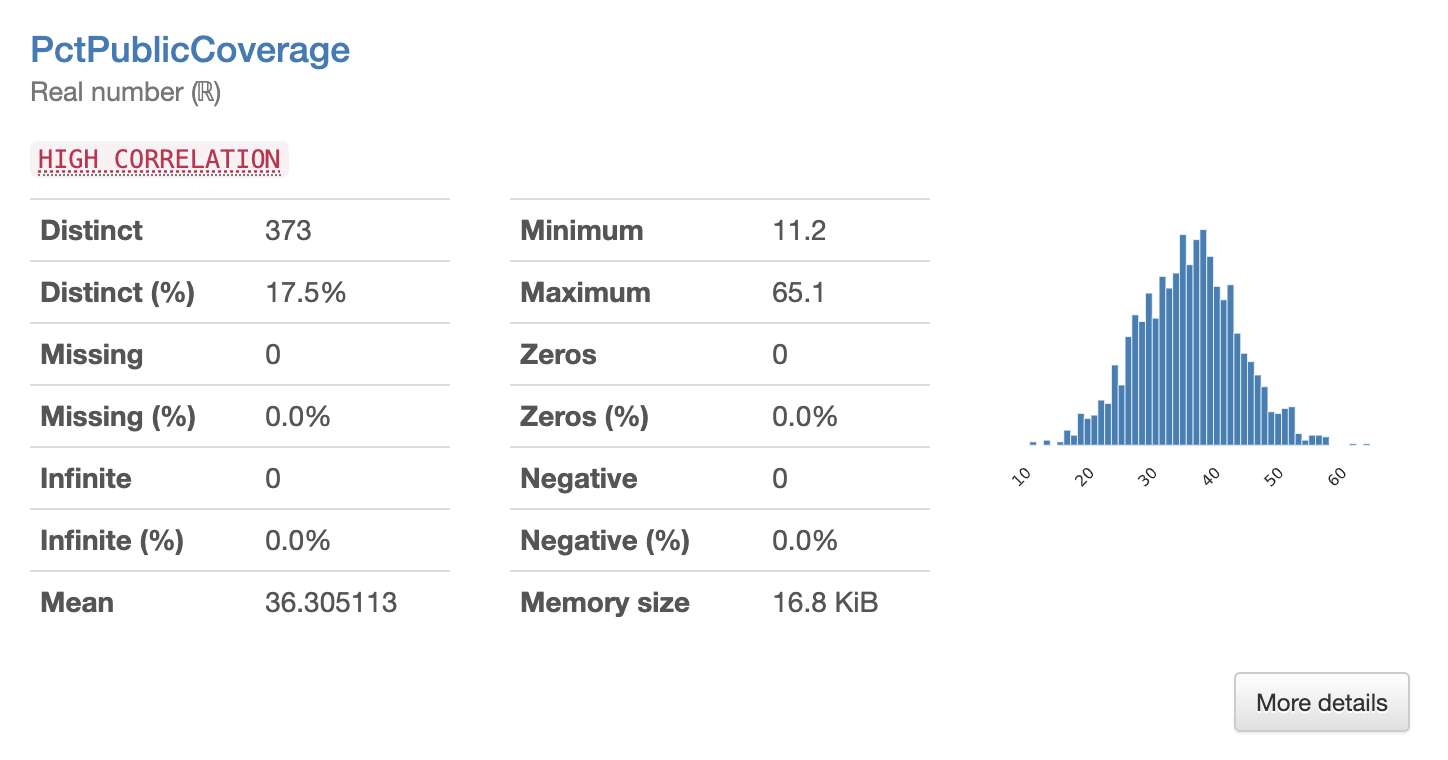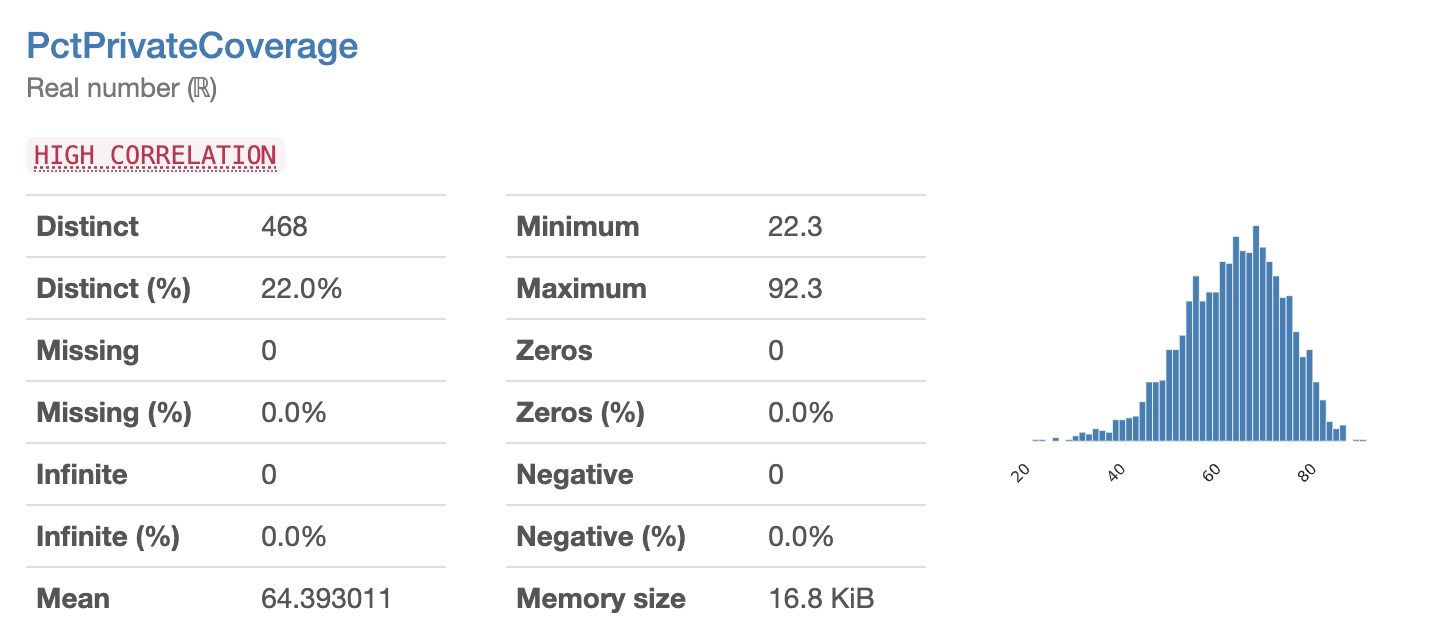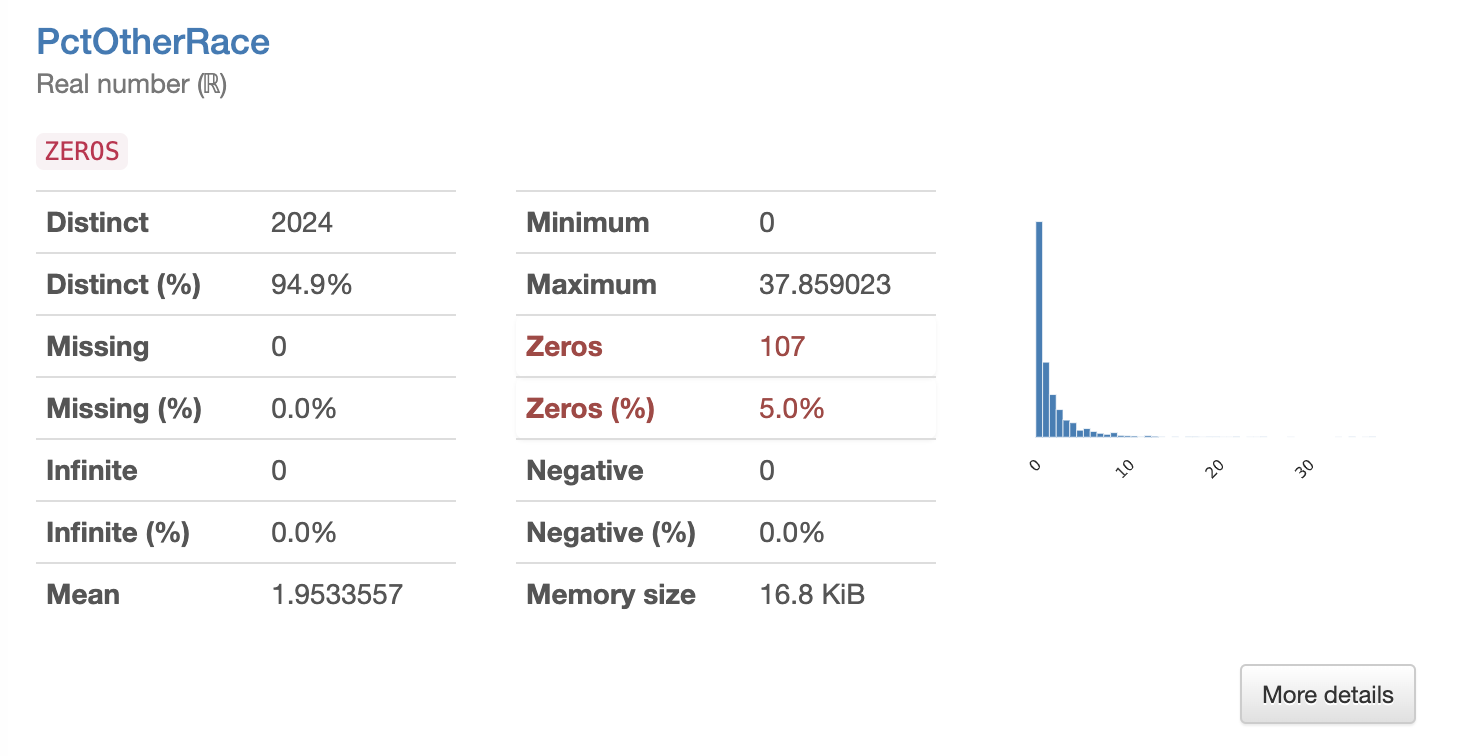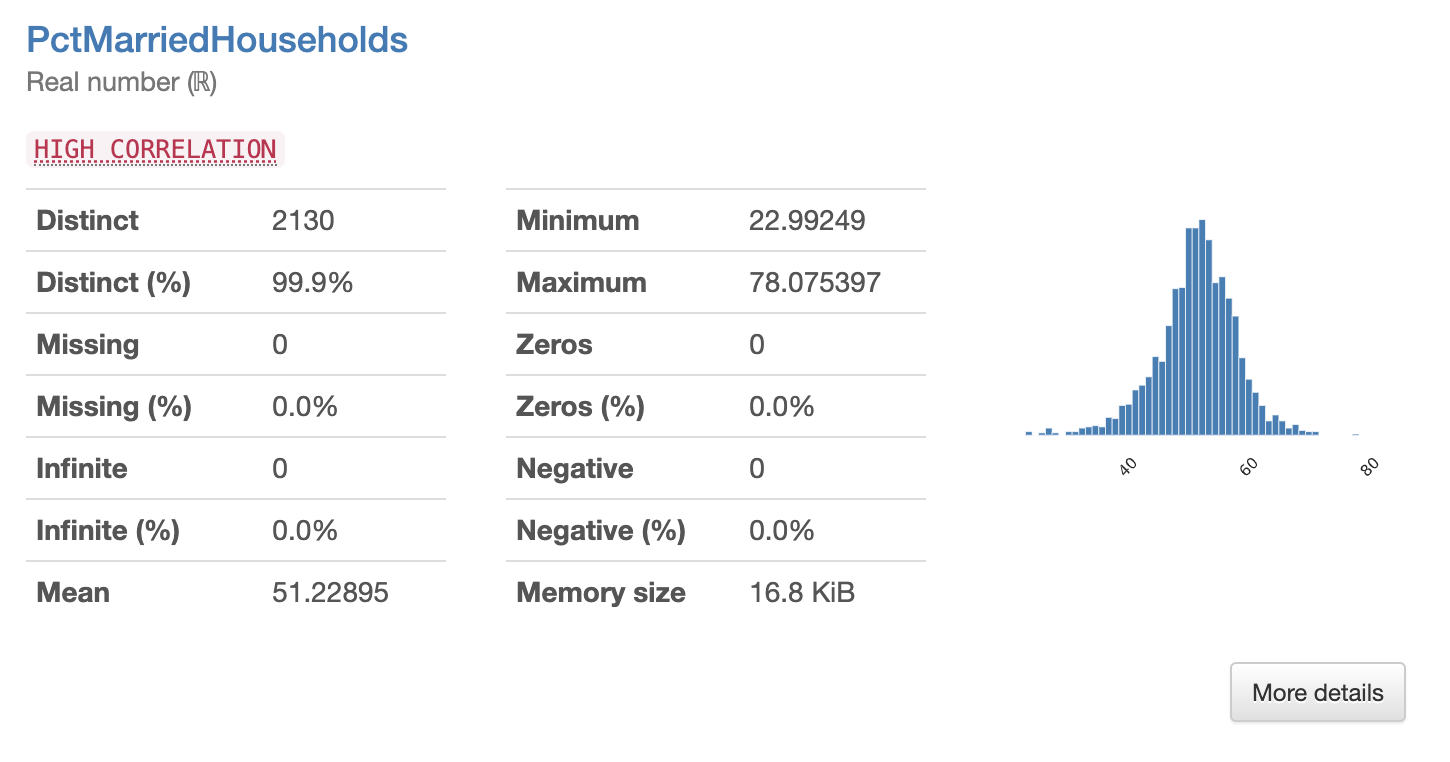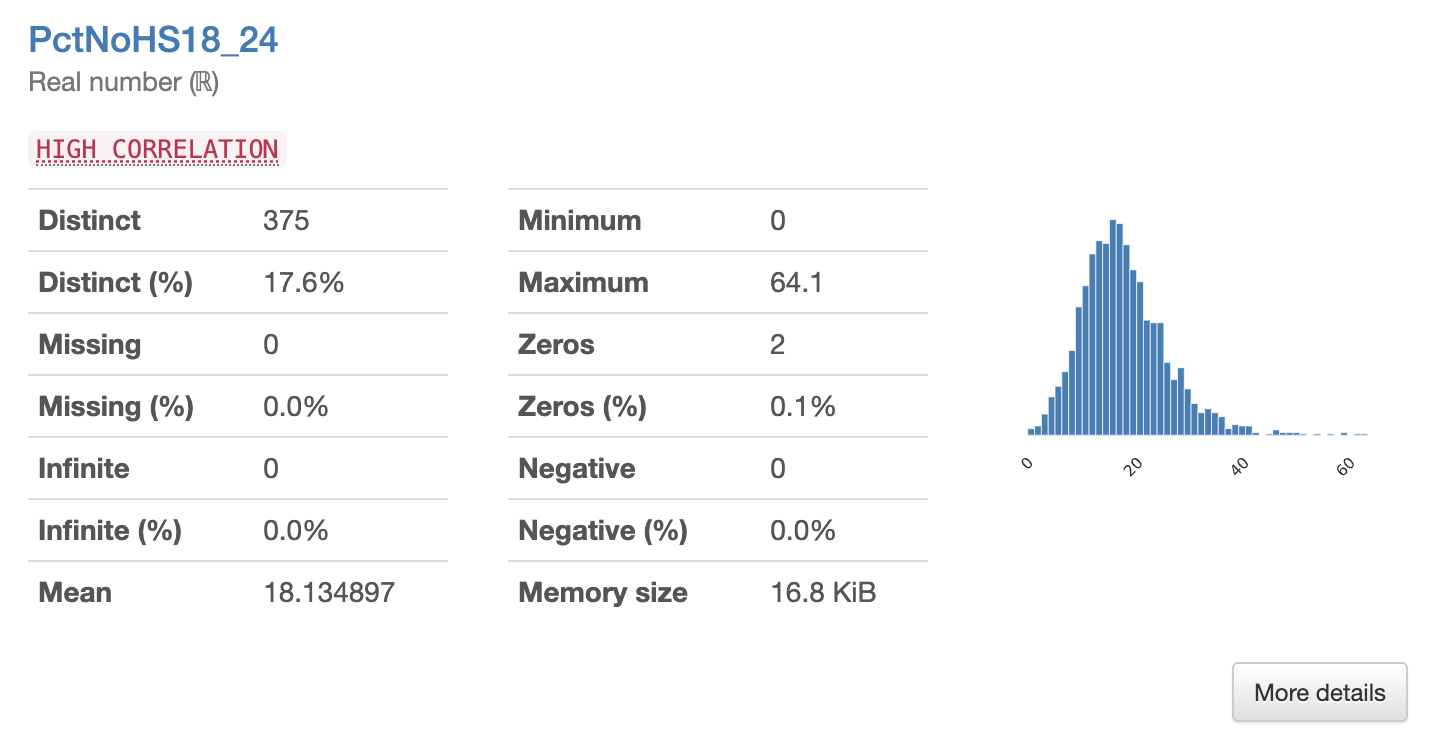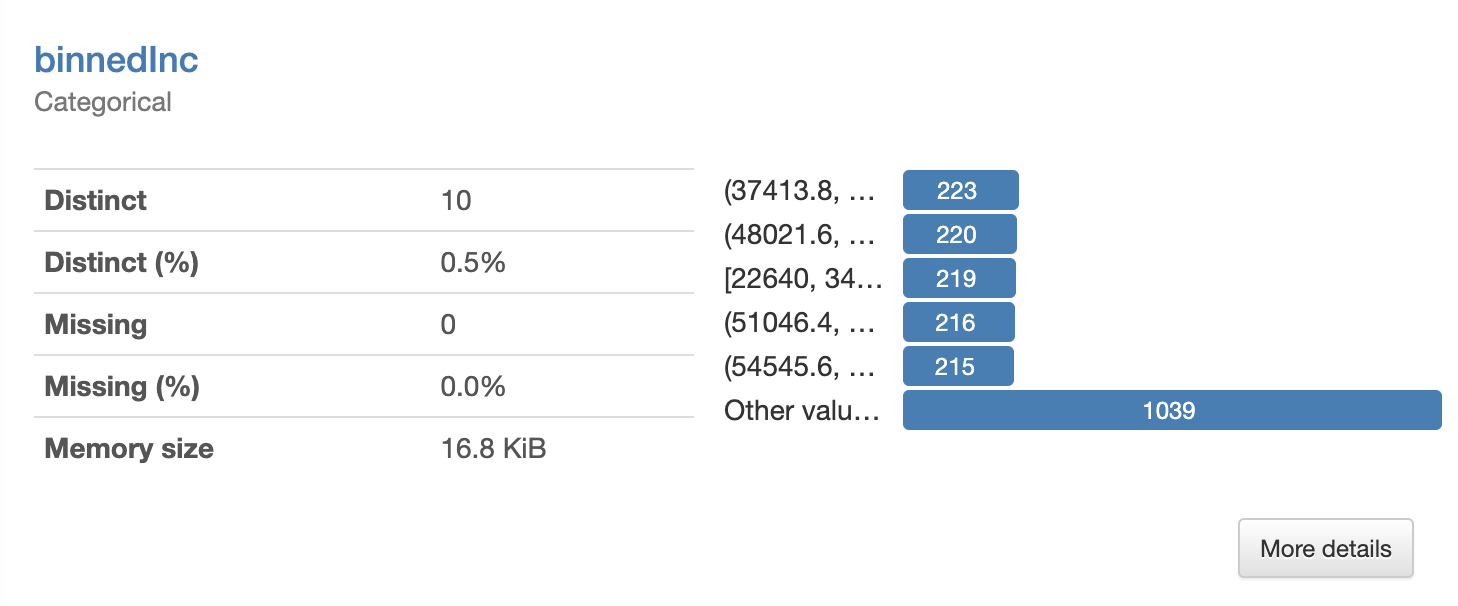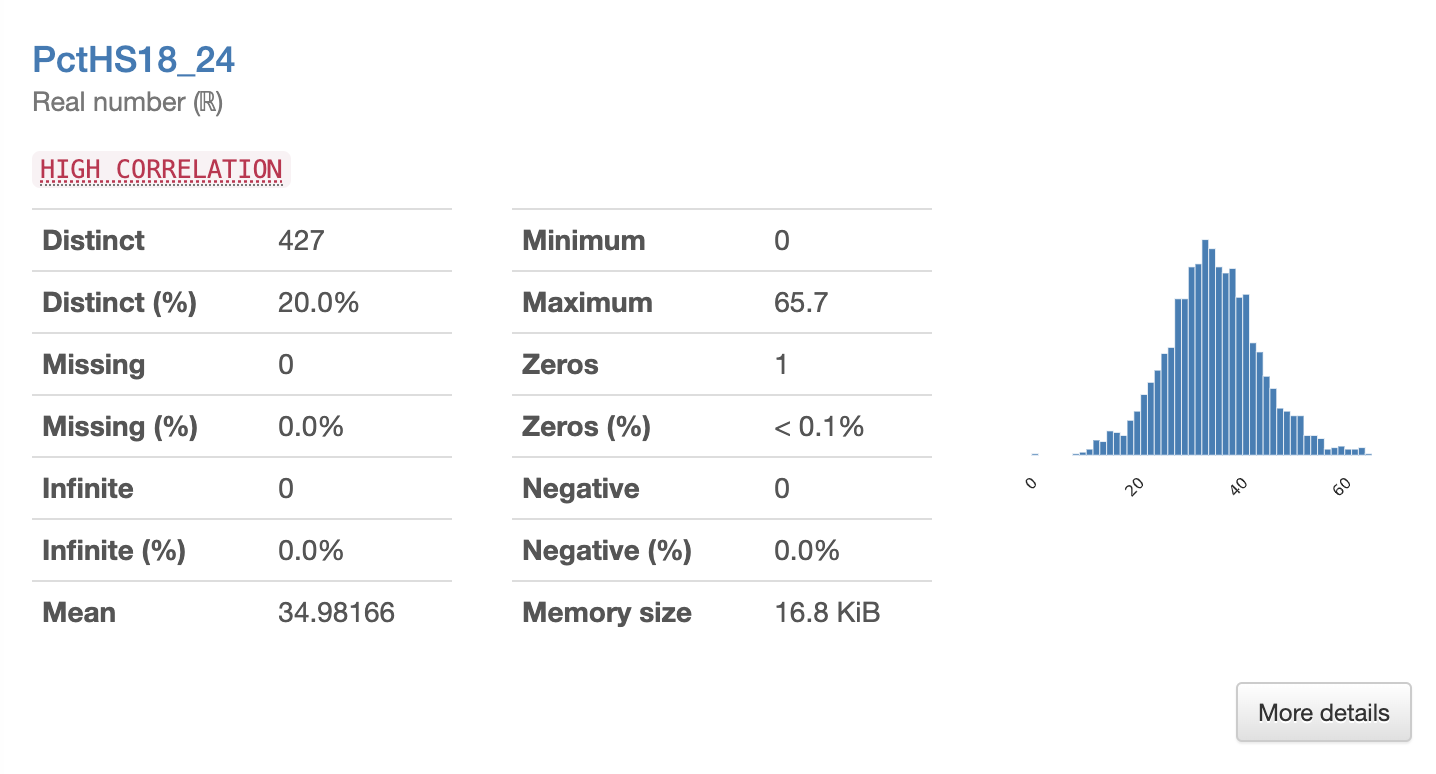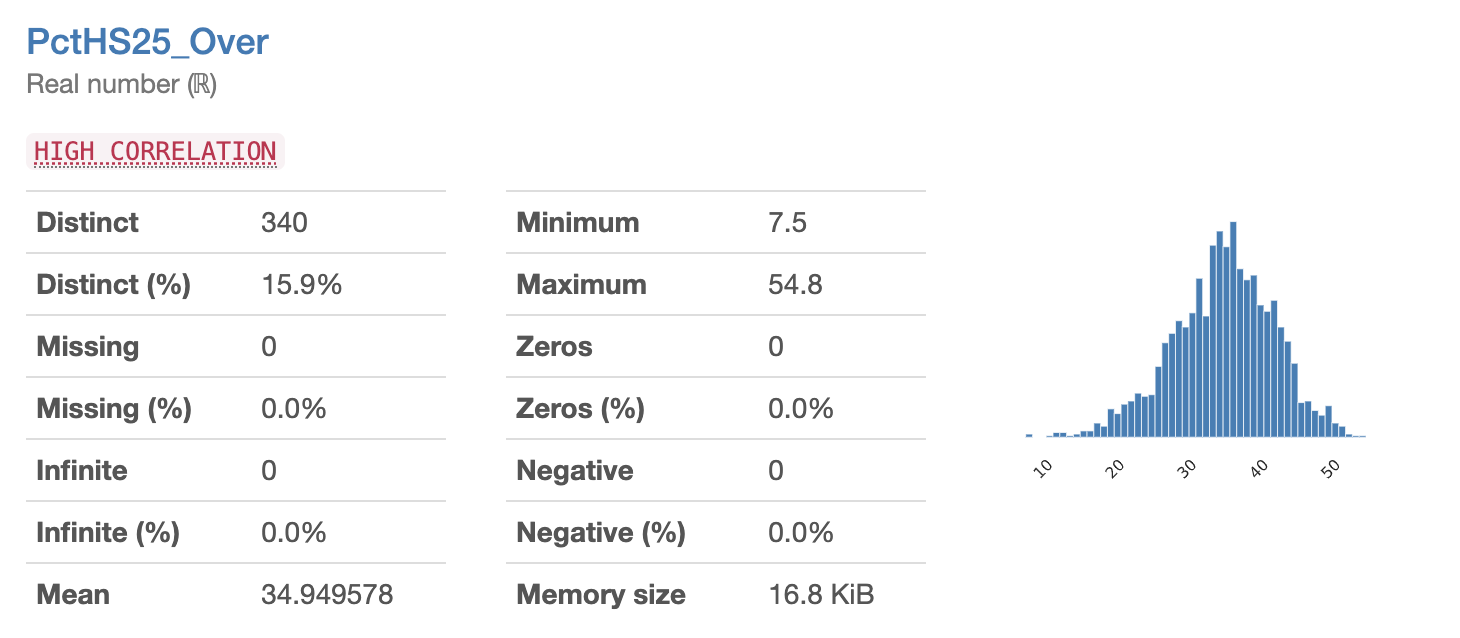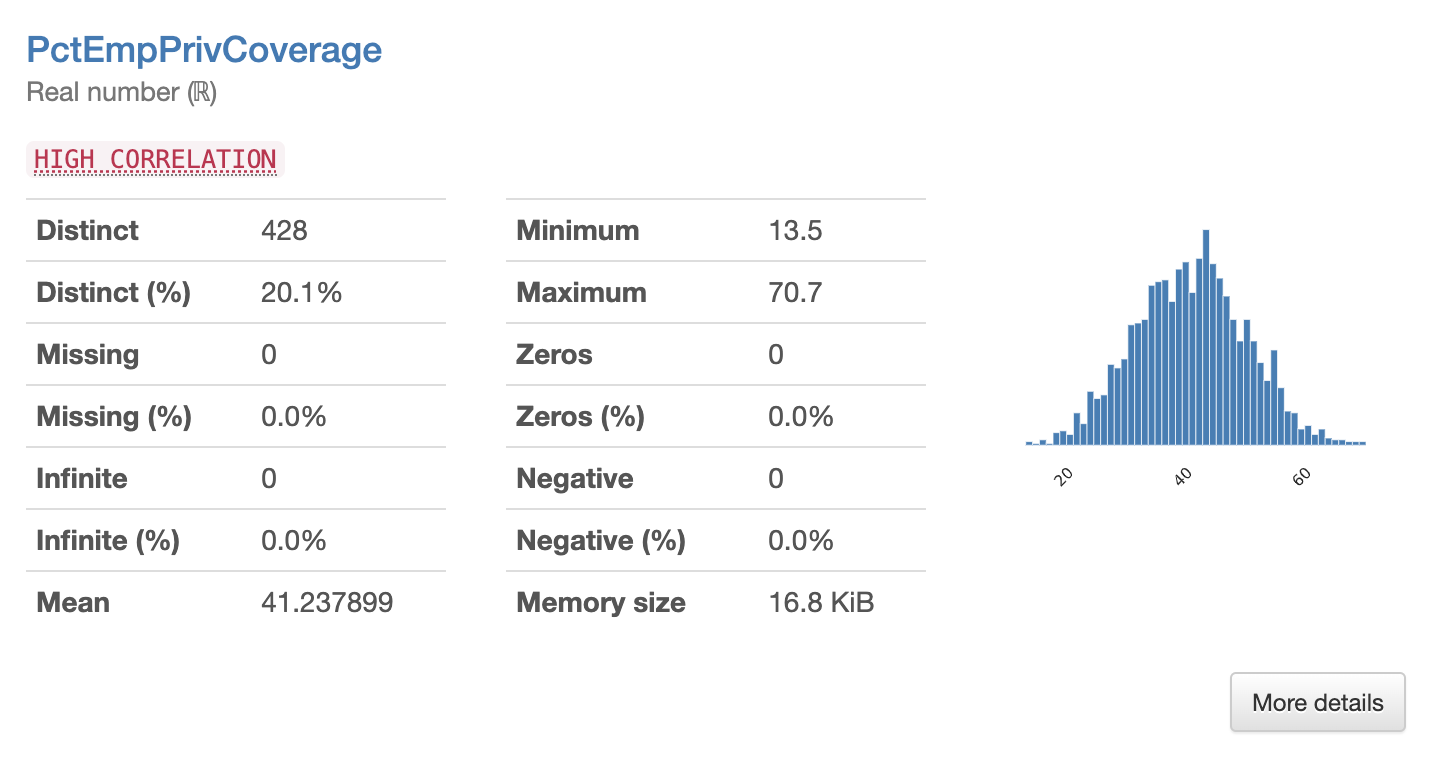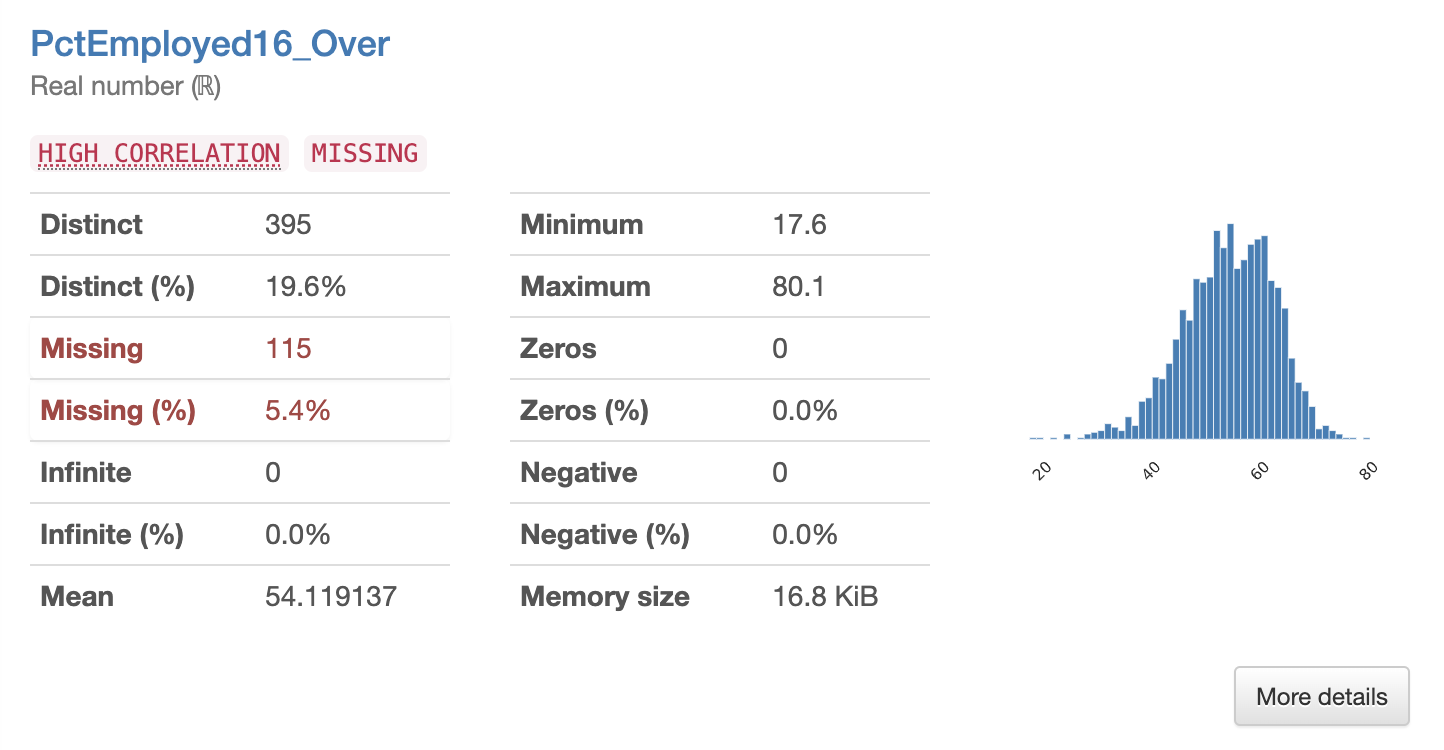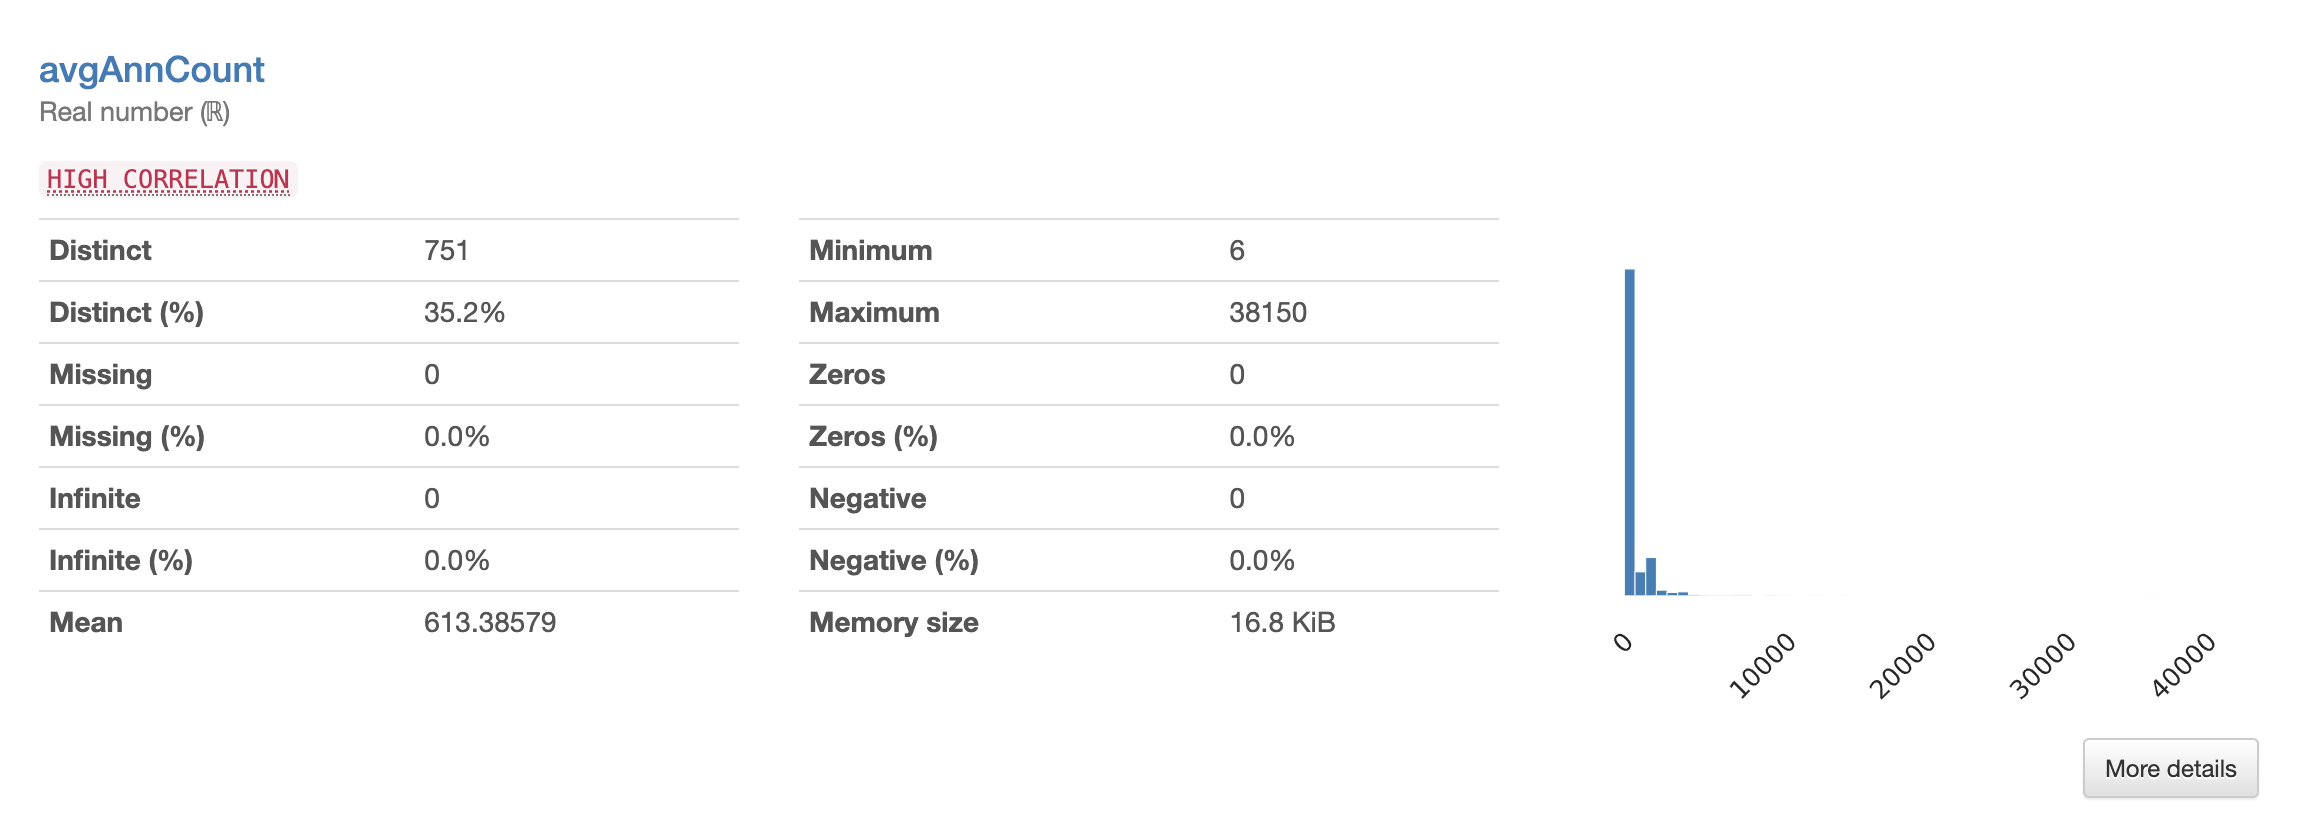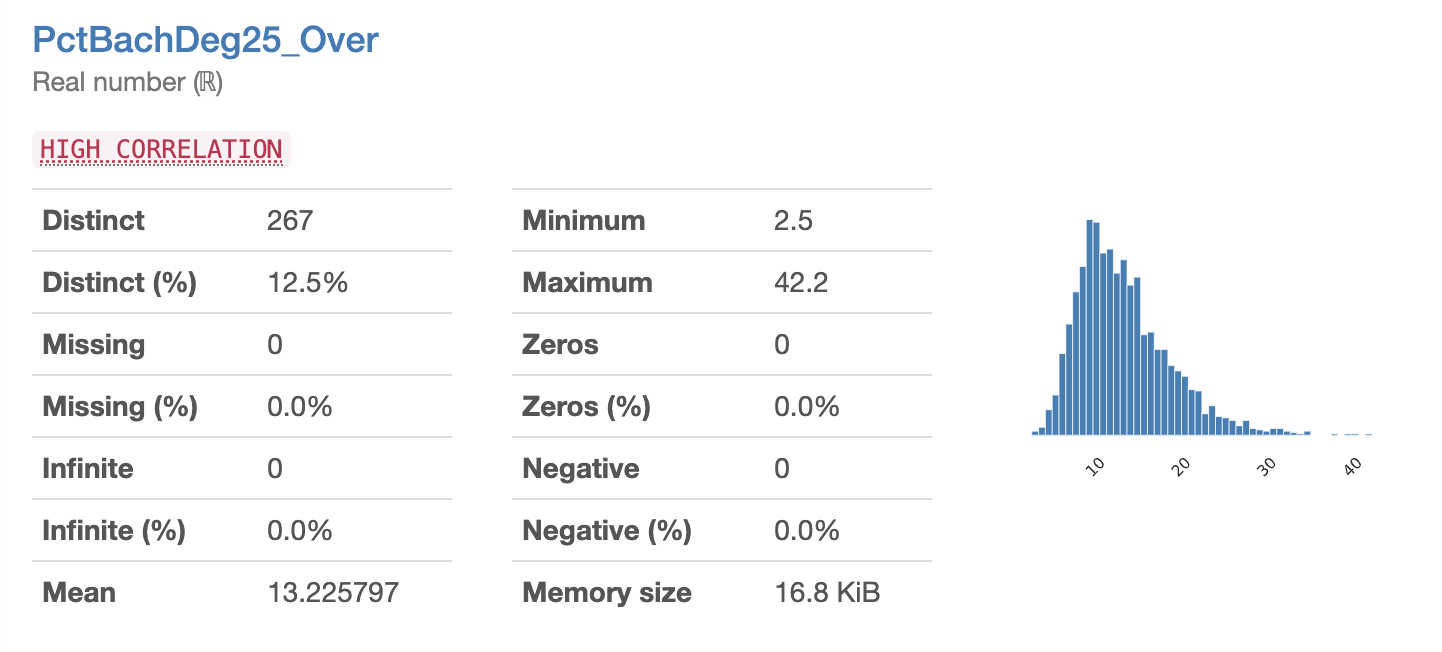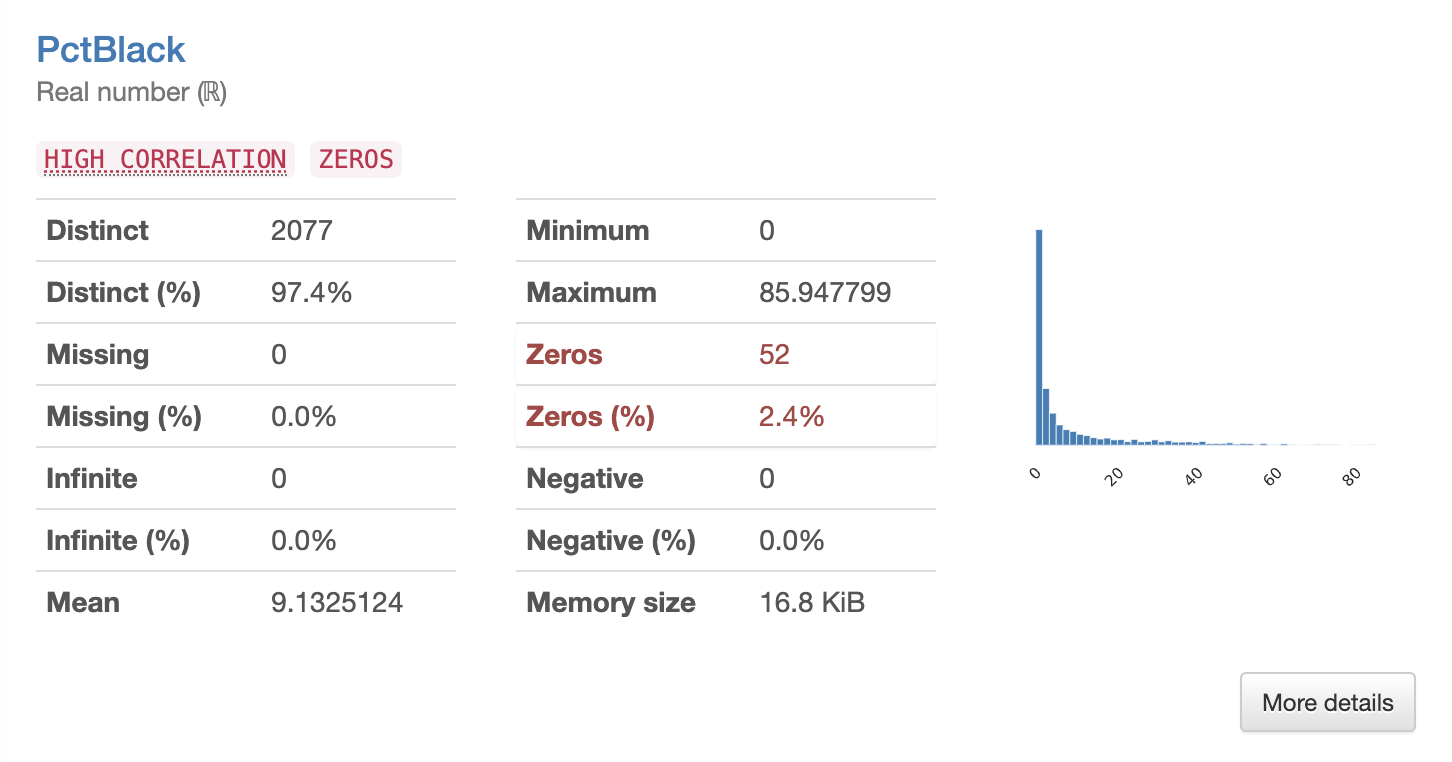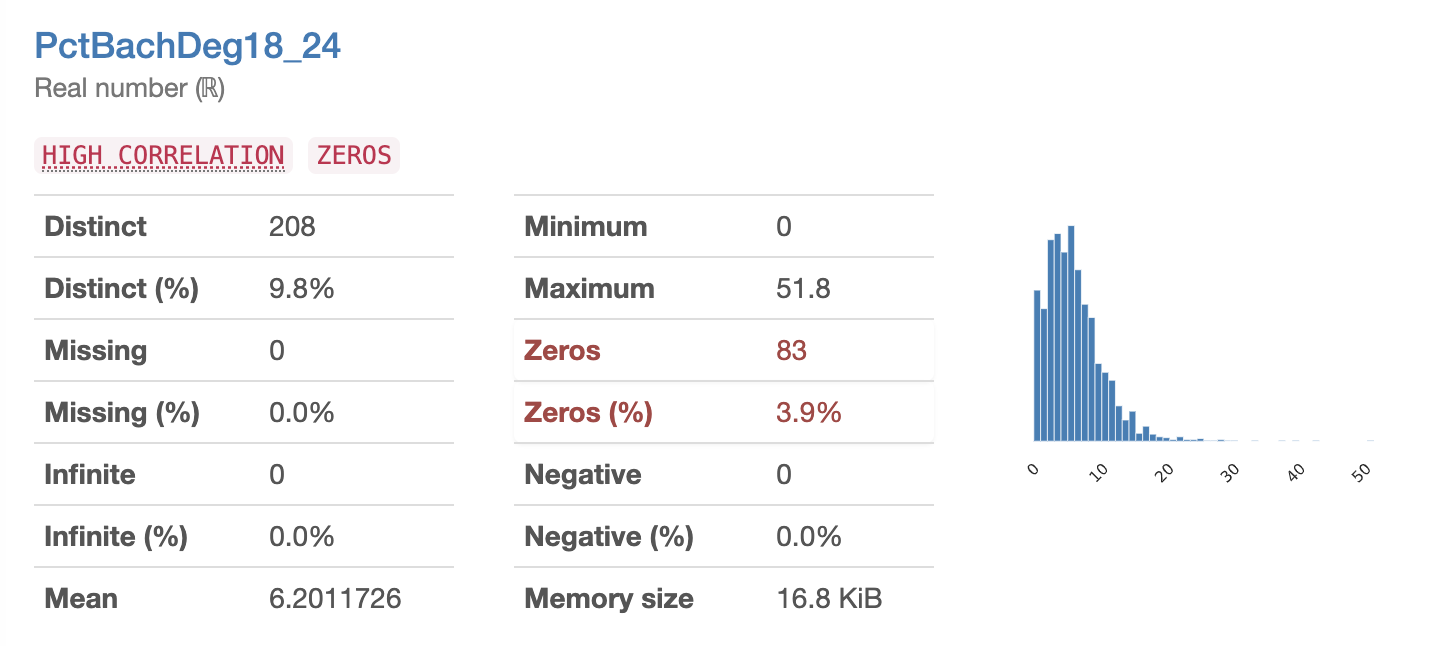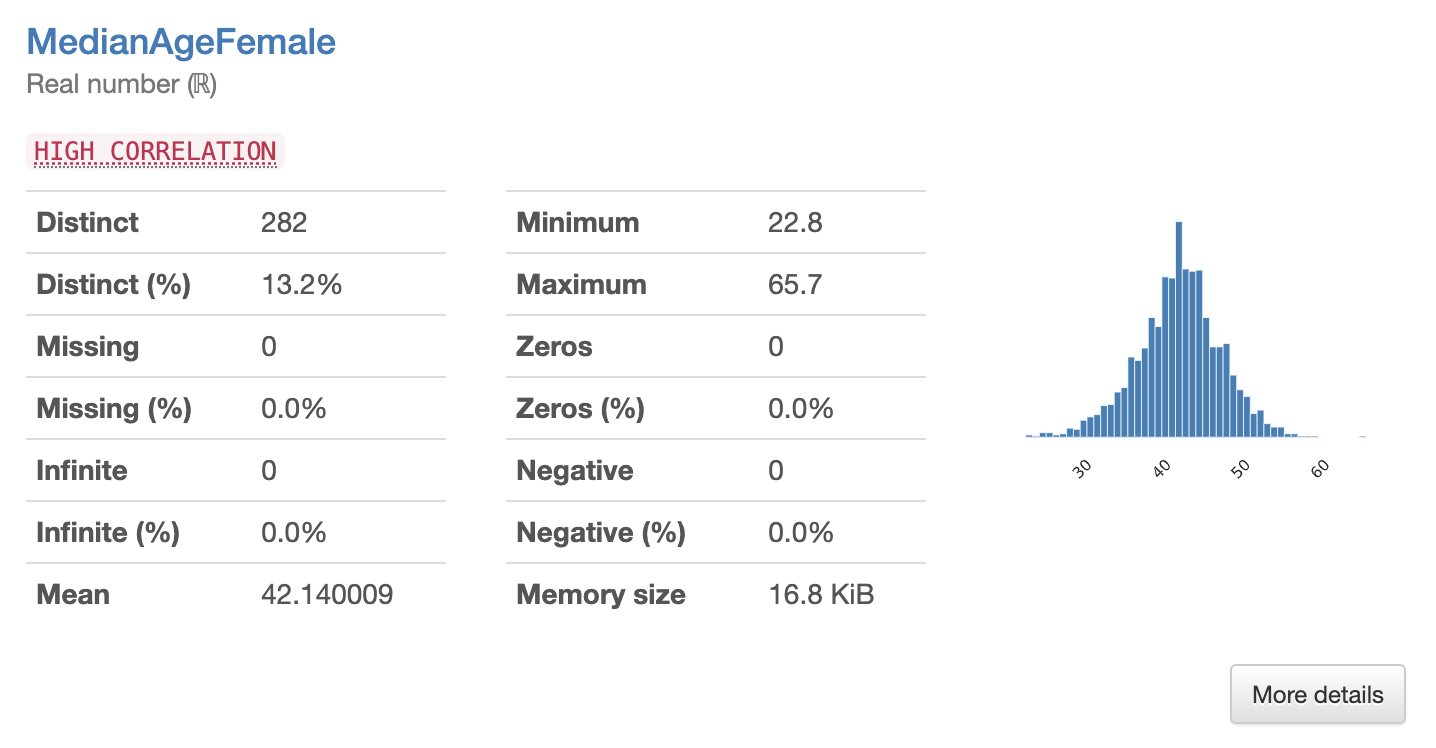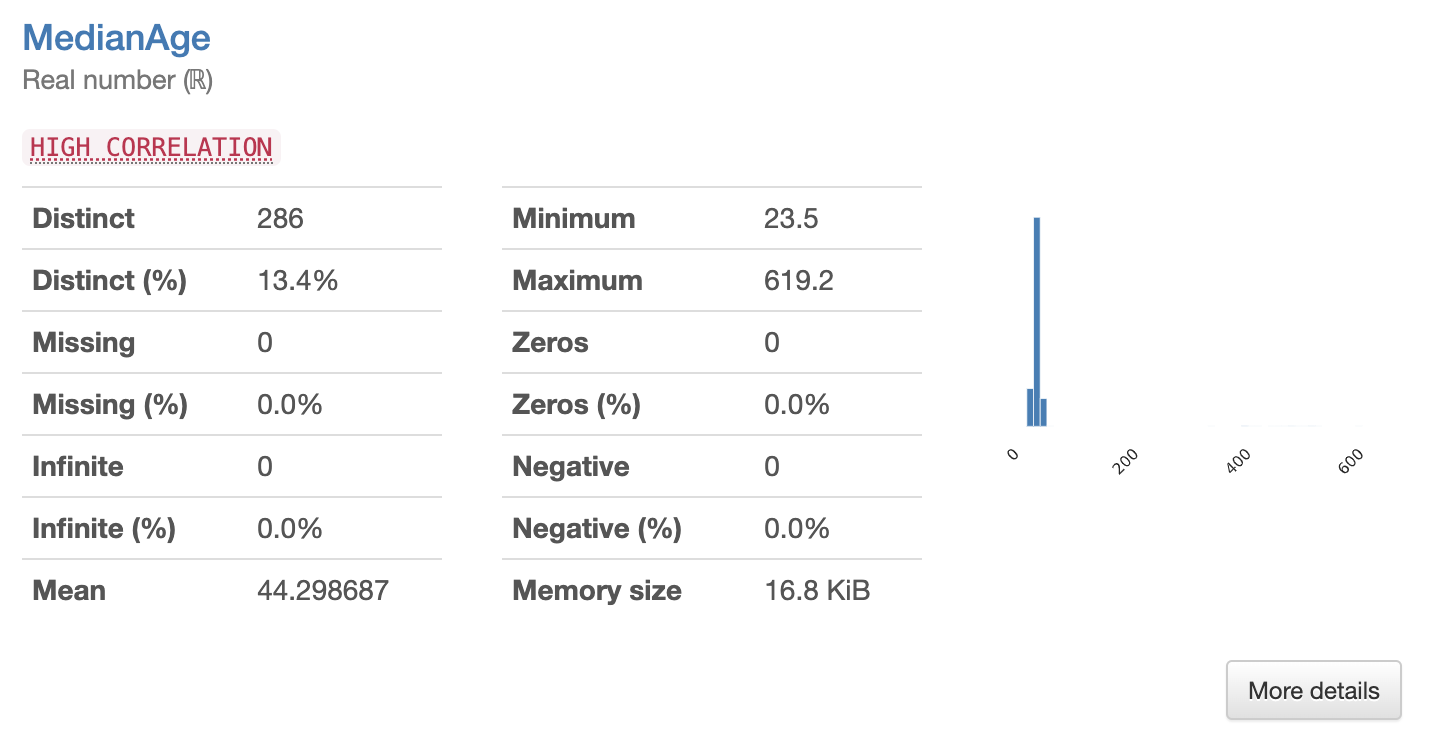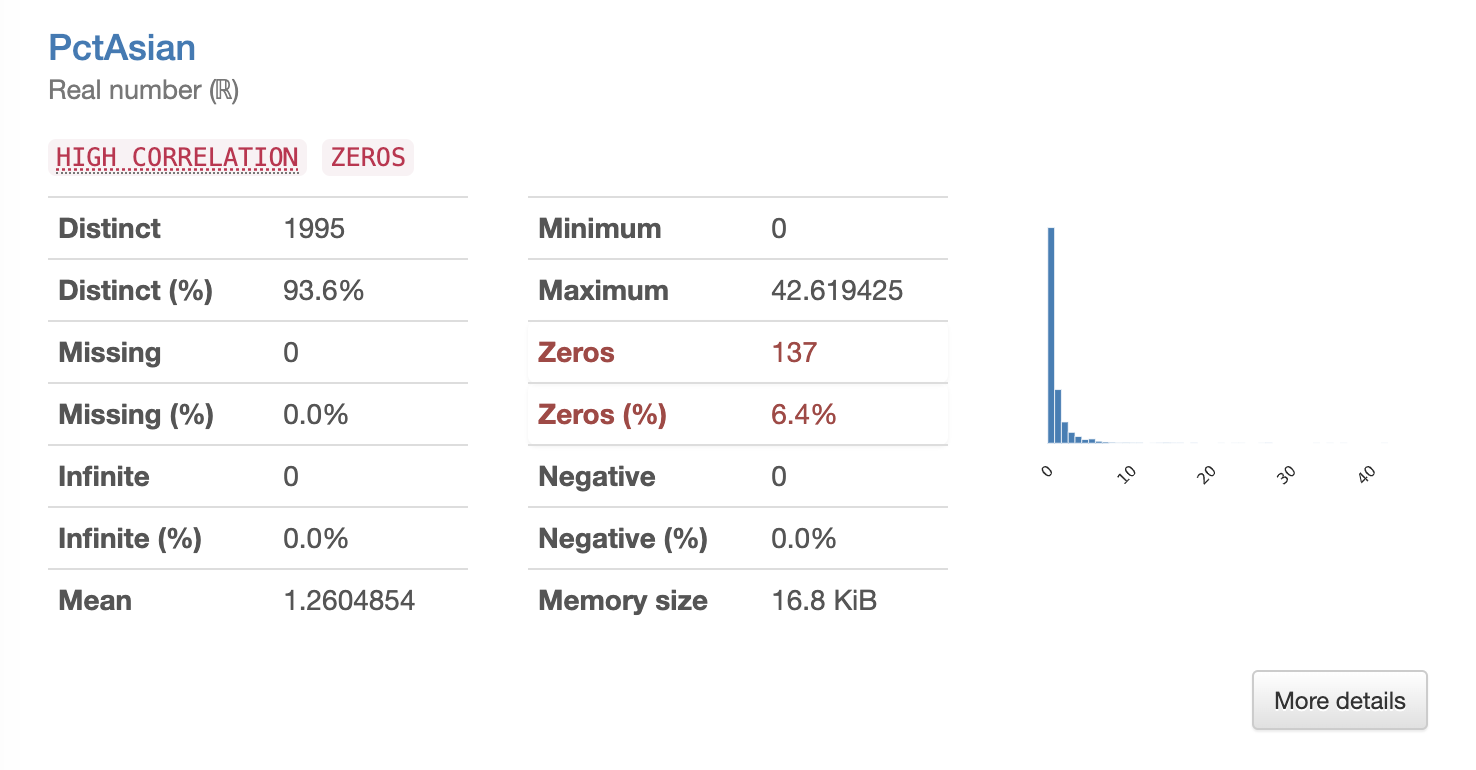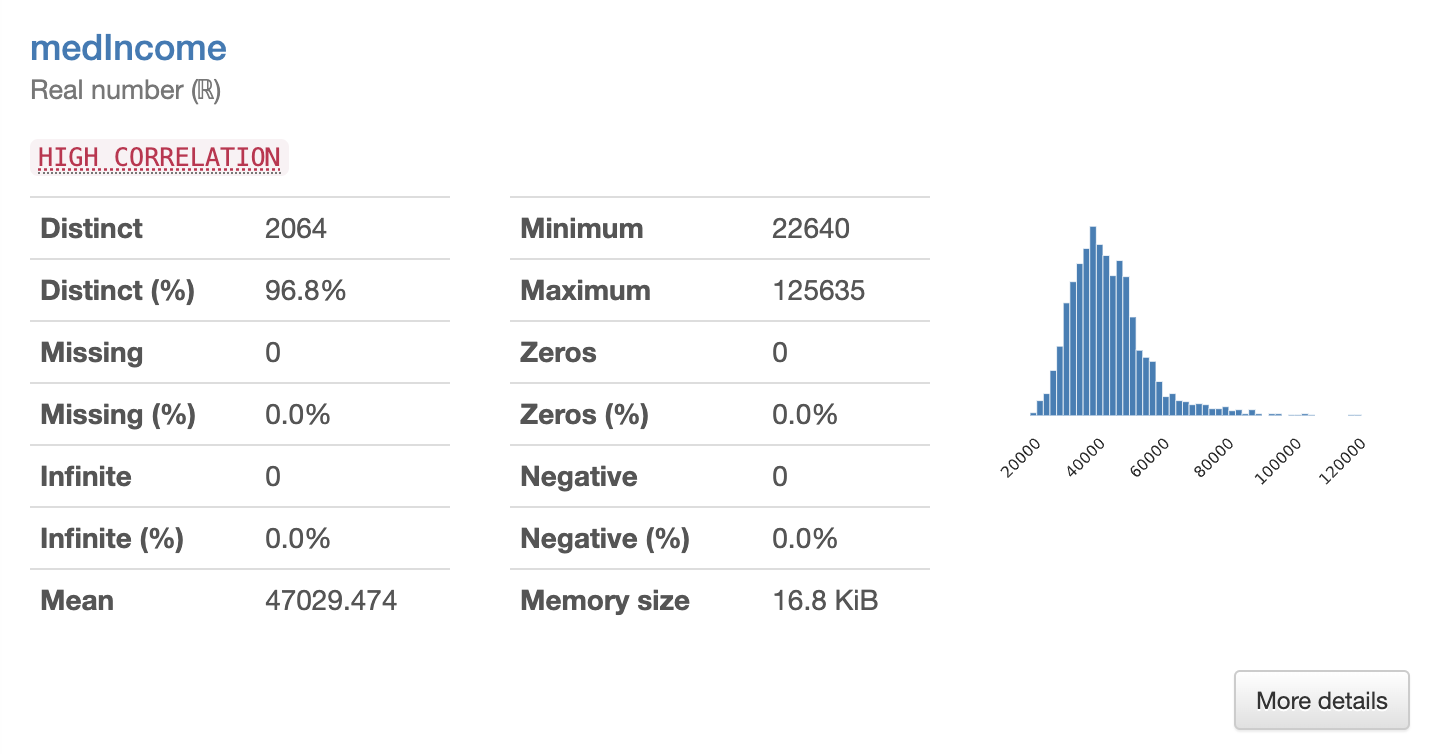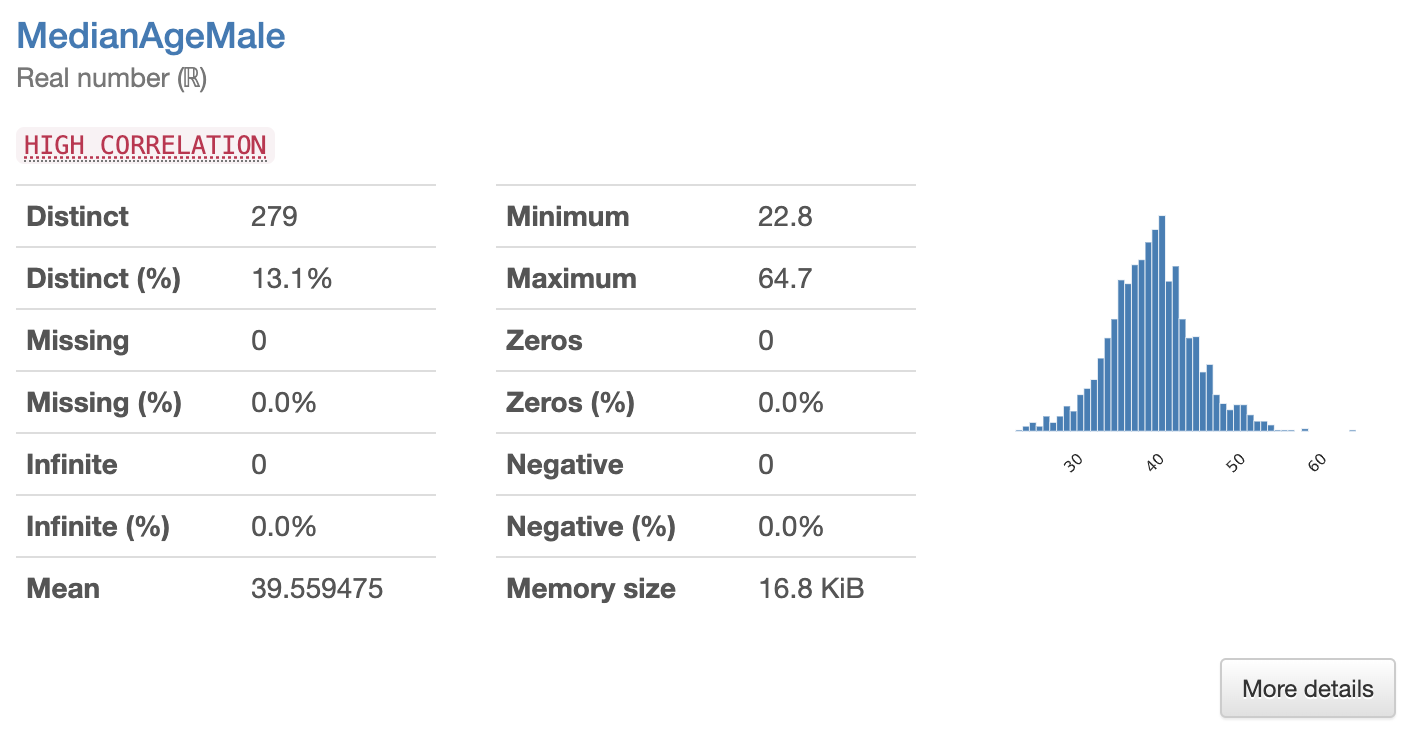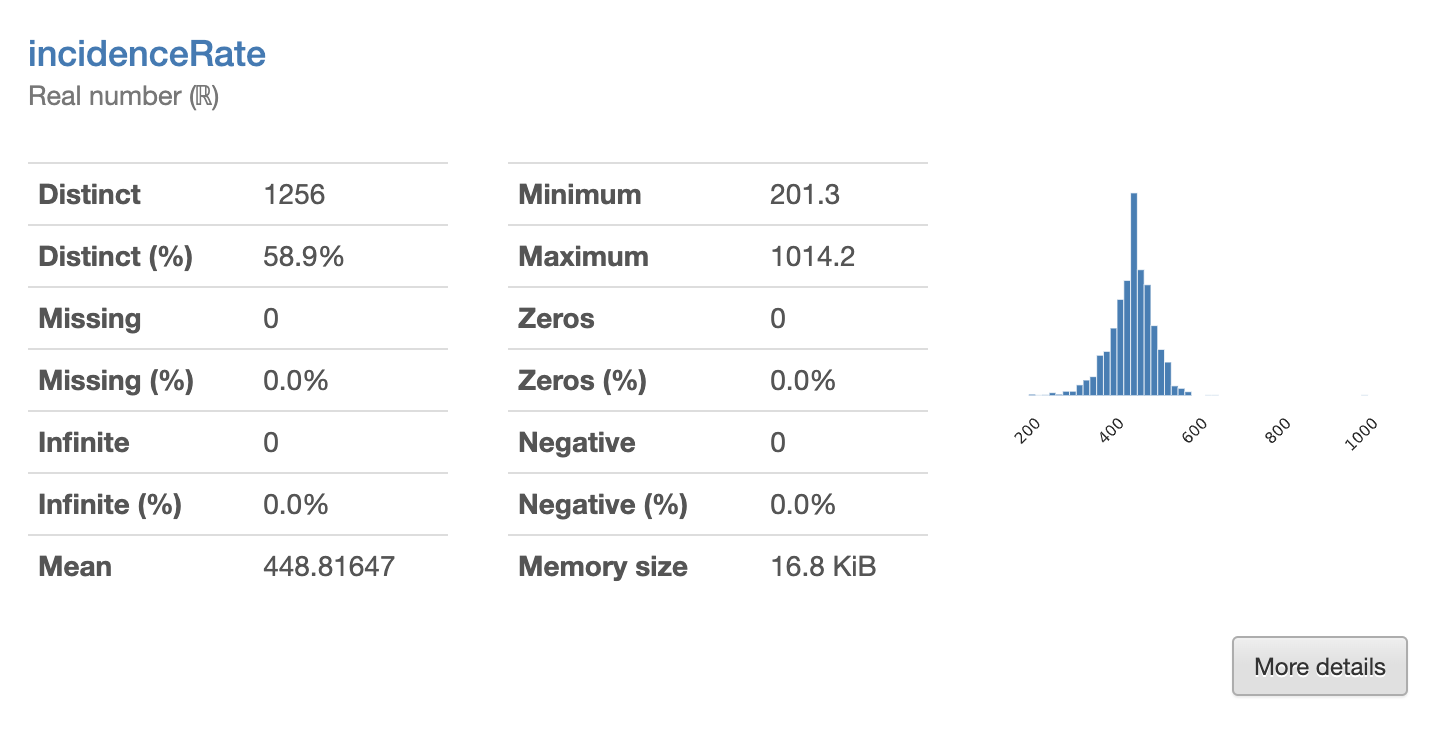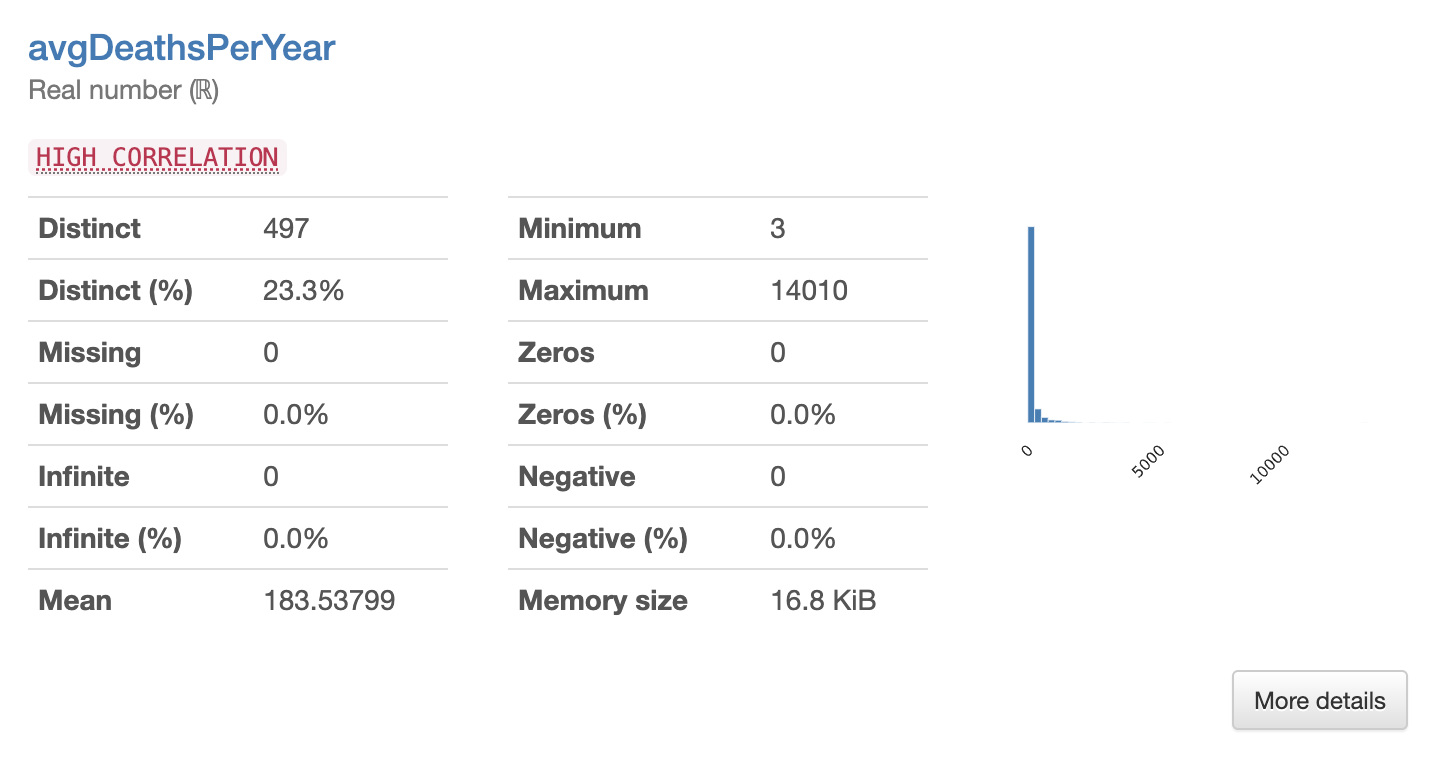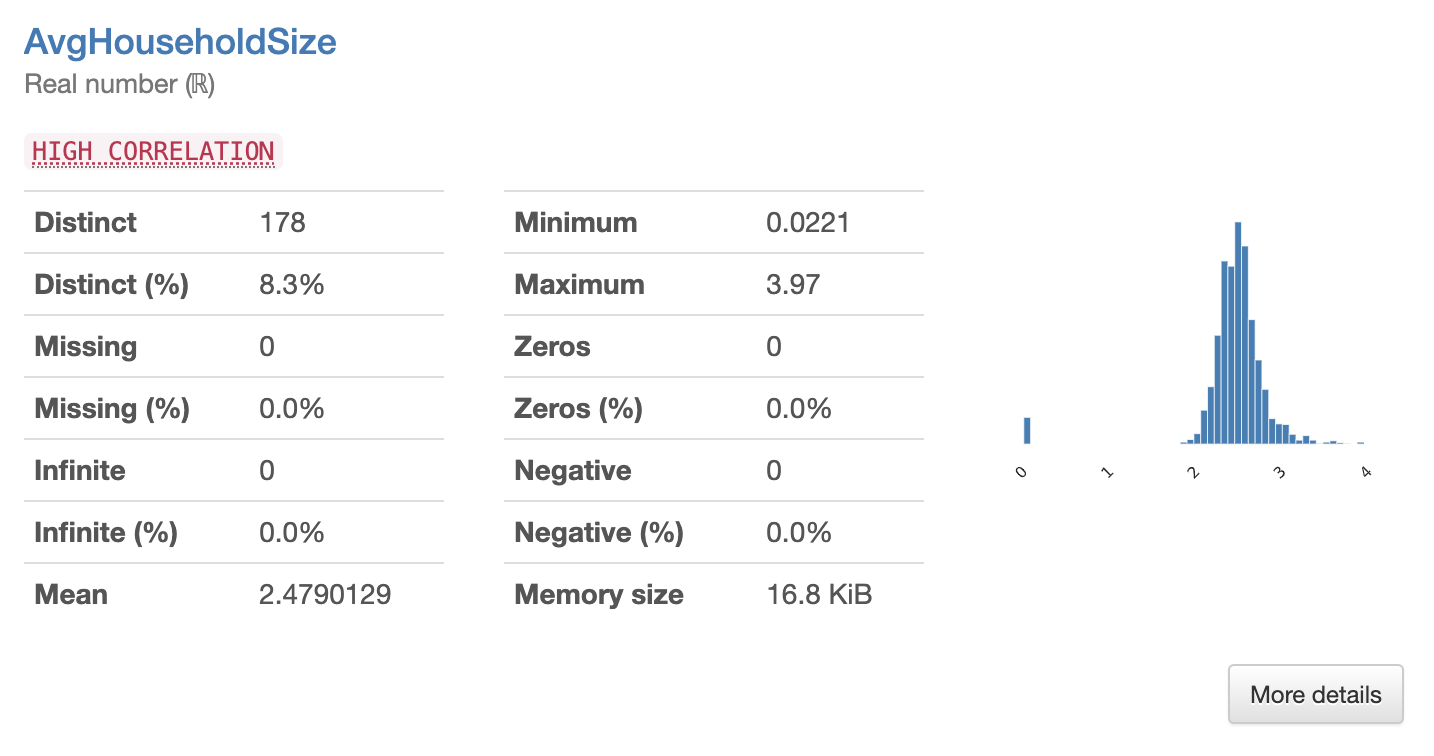

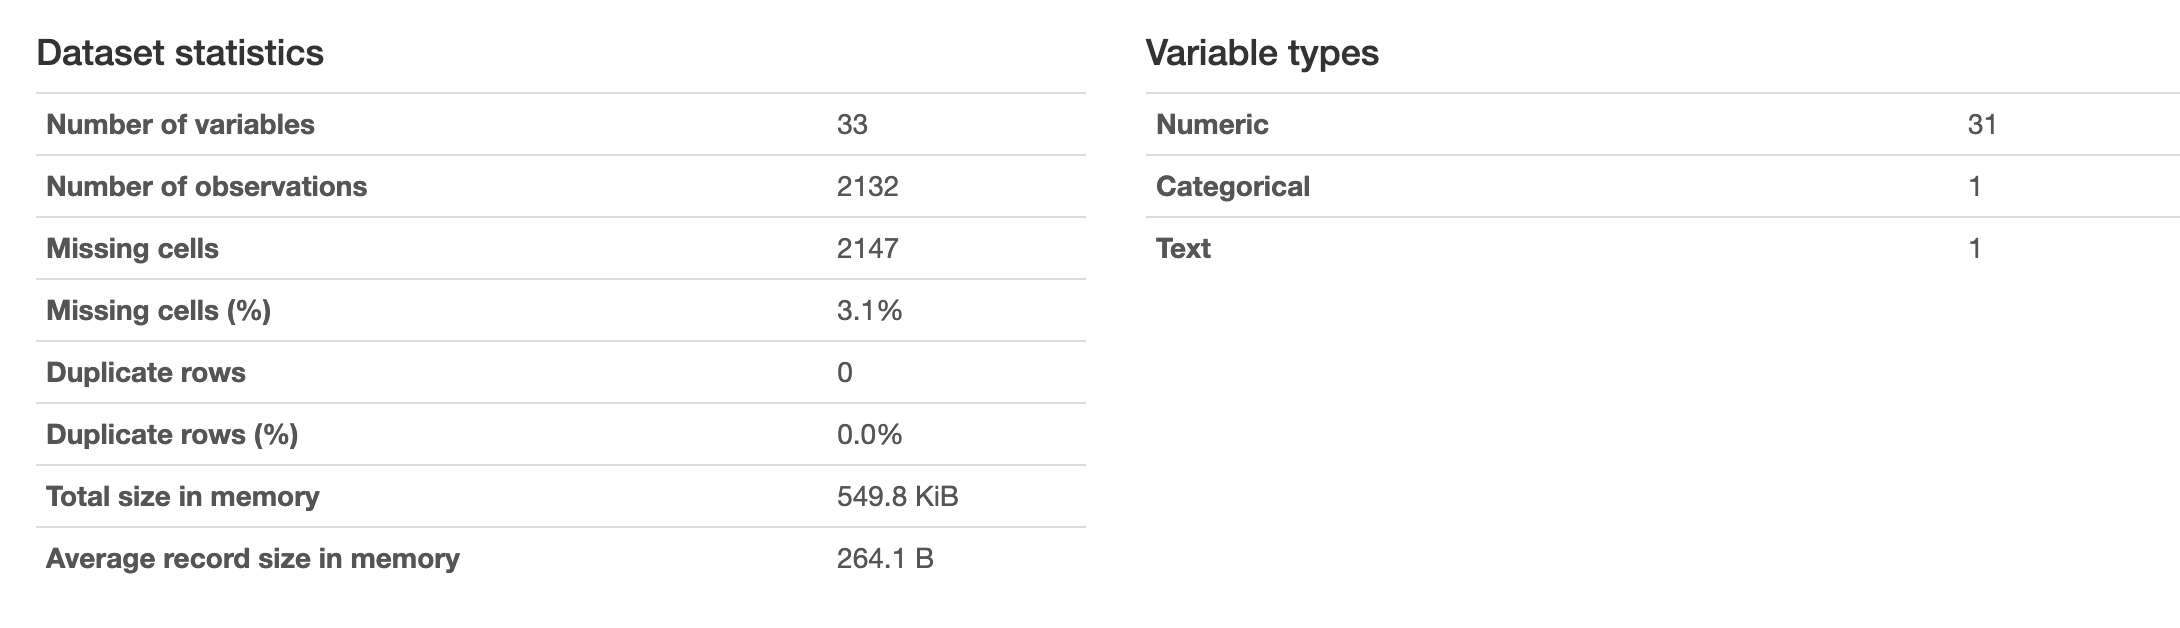

En general, se realizó el análisis en el conjunto de datos de entrenamiento, se hará el entrenamiento del modelo cuyos datos en crudo tienen una dimensionalidad de 33. En total, los datos de entrenamiento son 2132

Por otro lado, los datos contienen 31 datos categóricos, 1 dato categórico y un tipo de texto.

Así mismo, los datos contienen un 3.1% de datos nulos, por lo que es necesario tener en cuenta esta limpieza para dicho conjunto de datos y no contiene ningún tipo de datos duplicados.

Ahora, se presentará un reporte general de todos los datos, en términos de su distribución en caso de que sea una variable numérica, su número de variabilidad, el número de datos nulos y ceros que contiene cada atributo, y otros aspectos como su valor máximo, mínimo y frecuencia de datos en caso de que los datos sean categóricos



In [31]:
df_train_x.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1604
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          115
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     428
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

## PREPARACIÓN DE DATOS

## MODELADO

## EVALUACIÓN CUANTITATIVA